**PROJECT OVERVIEW**

Customer churn is a critical business probelm where organizations aim to identify customers who are likely to stop using their services.
This projects builds and evaluates ML models to predict customer churn, with a focus on proper validation, leakage prevention and interpretability.
The final solution uses a Random Forest Classifier with scikit-learn pipeline to achieve a strong performance using ROC-AUC score as the metric.

**DATASET DESCRIPTION**

**CustomerID** - Unique identifier
Age - Age of customer

**Gender** - Customer gender

**Tenure** - Duration in months the customer has been using the service

**Usage frequency** - Number of times the service was used in the last month

**Support calls** - Number of calls in the last month

**Payment Delay** -  Number of days payment was delayed in the last month

**Subscription Type** - Type of subscription selected

**Contract length** - Length of customer's contract

**Total spend** - Total amount spent by the customer

**Last Interaction** - Days since the last interaction with the company

**Churn (target)** - Whether the customer churned (1) or not (0)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
test_data = pd.read_csv(r"/content/sample_data/customer_churn_dataset-testing-master.csv")
test_data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


**INITIAL ANALYSIS**

In [3]:
#Loading the train data
train_data = pd.read_csv(r"/content/sample_data/customer_churn_dataset-training-master.csv")
train_data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [4]:
train_data.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [5]:
train_data.columns = train_data.columns.str.replace(" ", "_")

In [6]:
train_data.head()

,CustomerID,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [7]:
train_data.isna().sum()

,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage_Frequency,1
Support_Calls,1
Payment_Delay,1
Subscription_Type,1
Contract_Length,1
Total_Spend,1


In [8]:
train_data[train_data.Age.isna()]

,CustomerID,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
train_data.dropna(axis=0, inplace=True)

In [10]:
train_data.isna().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage_Frequency,0
Support_Calls,0
Payment_Delay,0
Subscription_Type,0
Contract_Length,0
Total_Spend,0


In [11]:
train_data.shape

(440832, 12)

In [12]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,440832.0,225398.667955,129531.918550,2.0,113621.75,226125.5,337739.25,449999.0
Age,440832.0,39.373153,12.442369,18.0,29.00,39.0,48.00,65.0
Tenure,440832.0,31.256336,17.255727,1.0,16.00,32.0,46.00,60.0
Usage_Frequency,440832.0,15.807494,8.586242,1.0,9.00,16.0,23.00,30.0
Support_Calls,440832.0,3.604437,3.070218,0.0,1.00,3.0,6.00,10.0
Payment_Delay,440832.0,12.965722,8.258063,0.0,6.00,12.0,19.00,30.0
Total_Spend,440832.0,631.616223,240.803001,100.0,480.00,661.0,830.00,1000.0
Last_Interaction,440832.0,14.480868,8.596208,1.0,7.00,14.0,22.00,30.0
Churn,440832.0,0.567107,0.495477,0.0,0.00,1.0,1.00,1.0


In [13]:
train_data.duplicated().sum()

np.int64(0)

**UNIVARIATE ANALYSIS**

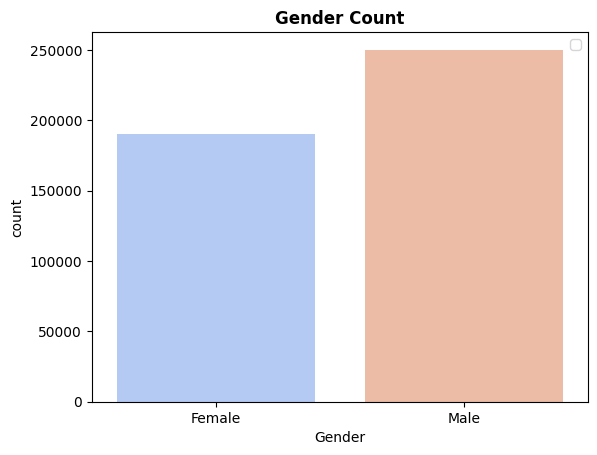

In [14]:
plt.title("Gender Count", fontweight="bold")
sns.countplot(data=train_data, x="Gender", palette="coolwarm")
plt.legend()
plt.show()

There are more men than women in the dataset

## HISTOGRAMS
Used to spot patterns, identify outliers and understand distribution

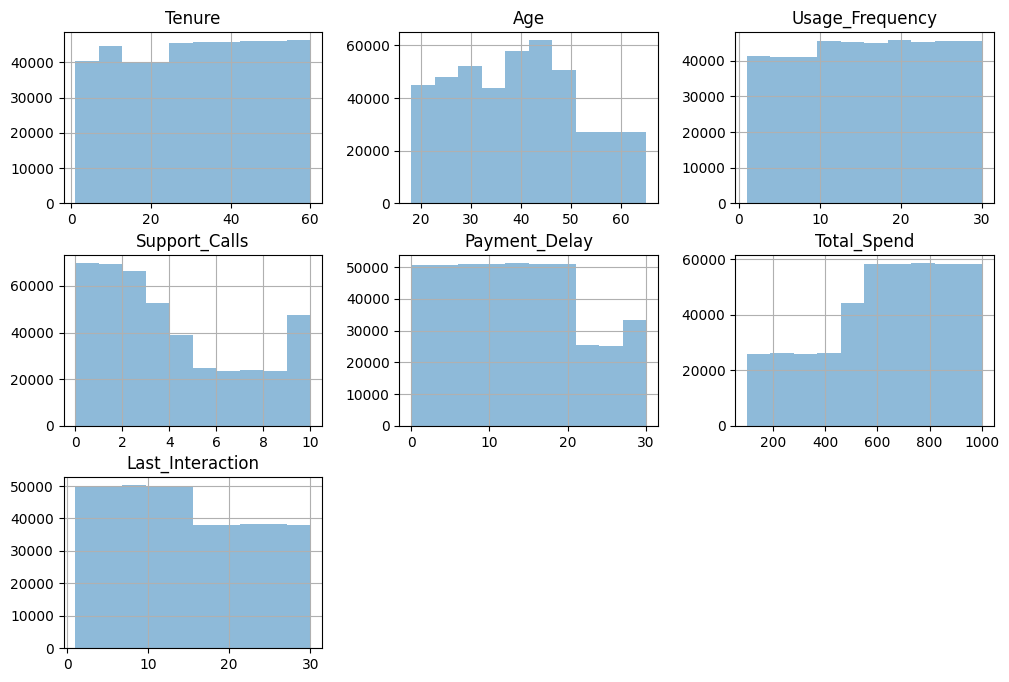

In [15]:
train_data.hist(column=["Tenure", "Age", "Usage_Frequency", "Support_Calls", "Payment_Delay", "Total_Spend", "Last_Interaction", ], figsize=(12,8), alpha=0.5)
plt.show()

#### BOX PLOTS
For outlier detection

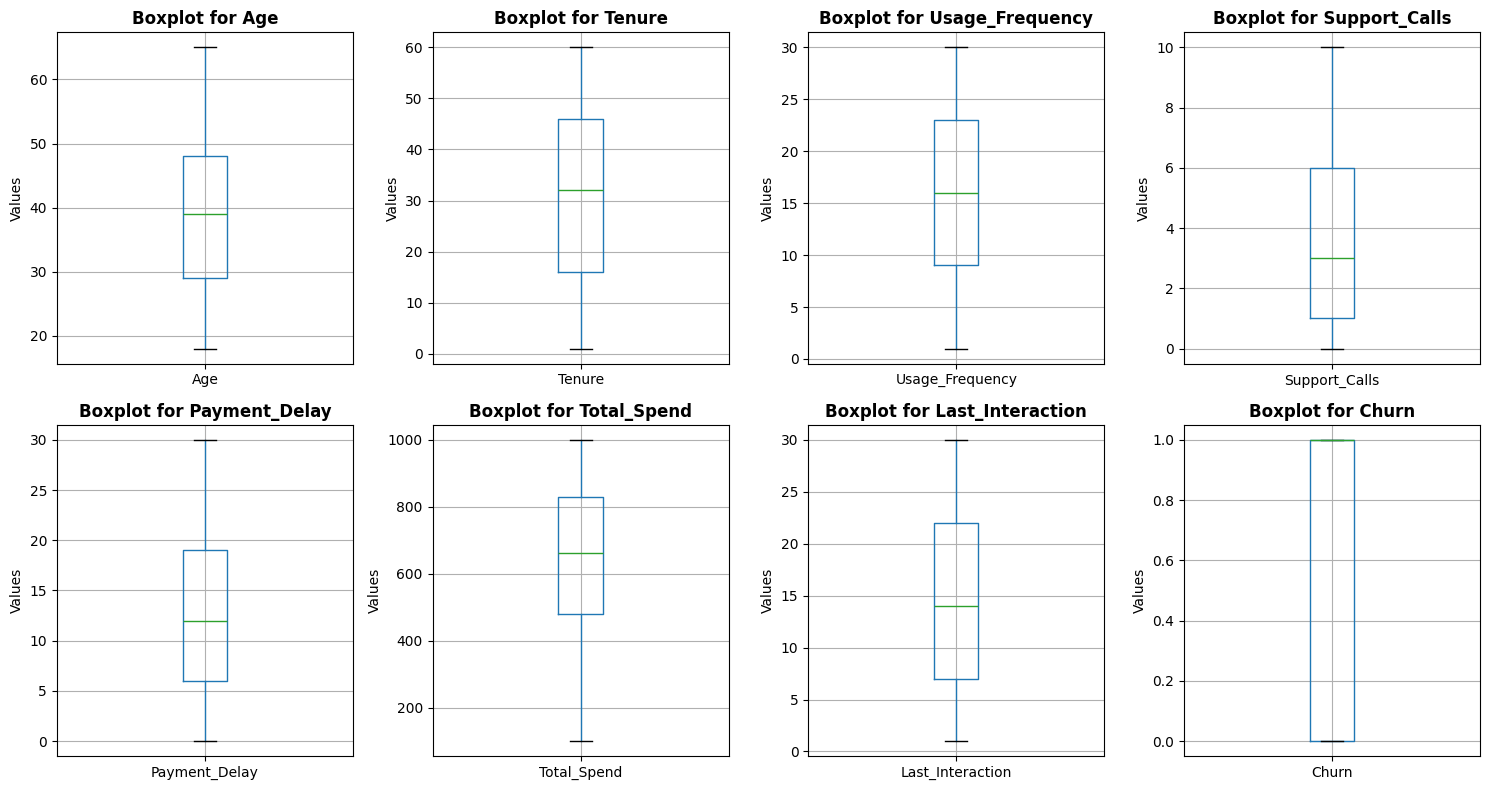

In [16]:
columns = [col for col in train_data.columns if train_data[col].dtype=="float64" and col != "CustomerID"]

len(columns)
#Defining a grid layout
n_rows, n_cols = 2, 4
#Create a figure ans set subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,8))
axes = axes.flatten()
for i, col in enumerate(columns):
    train_data.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f"Boxplot for {col}", fontweight="bold")
    axes[i].set_ylabel("Values")
plt.tight_layout()
plt.show()

### Observations
1. The data(numerical features have no outliers). Outliers can:
    - Skew parameters(linear regression) leading to bias/inaccuracy
    - Inflated Error metrics, MSE
    - Overfitting
    - Distortion of feature relationships: correlation, PCA
2. Decisions:
    - *Remove* - if it is a measurement erroR
    - *Keep* - in datasets like fraud detection or medical diagnosis
3. Robust Alternatives
     If outliers cannot be removed but are causing issues:
     Use: Random forest, XGBoost,
     Use: Data transformation: logarithmic, square root
     use: Capping: at 99th percentile etc

**CATEGORICAL FEATUES**

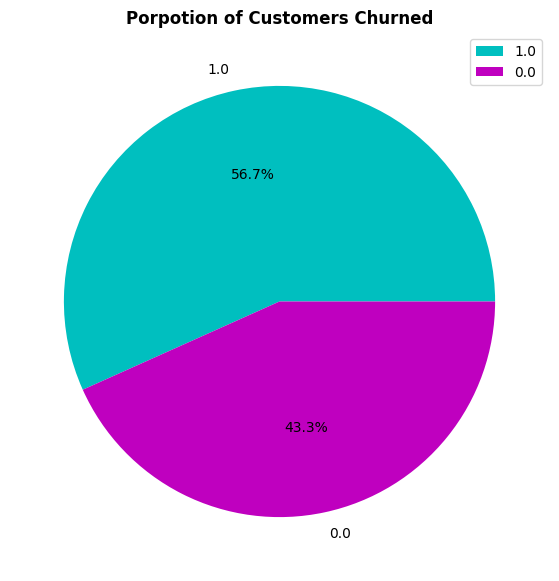

In [17]:
#Proportion of customers churned
churn_count = train_data["Churn"].value_counts()
plt.figure(figsize=(8,7))
plt.pie(x=churn_count.values, labels=churn_count.index, autopct='%.1f%%', colors=['c','m'])
plt.title("Porpotion of Customers Churned", fontweight="bold")
plt.legend()
plt.show()

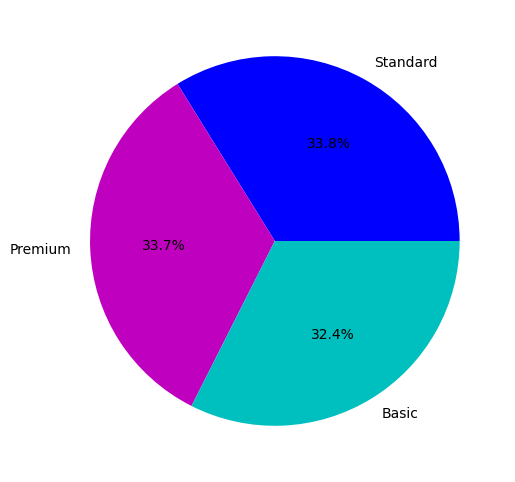

In [18]:
#Proportion of subscription count
subscription_count = train_data["Subscription_Type"].value_counts()
plt.figure(figsize=(8,6))
plt.pie(subscription_count.values, labels=subscription_count.index, colors=["blue","m","c"], autopct='%.1f%%')
plt.show()

**BIVARIATE EDA-FEATURE VS TARGET**

**AGE VS CHURN**



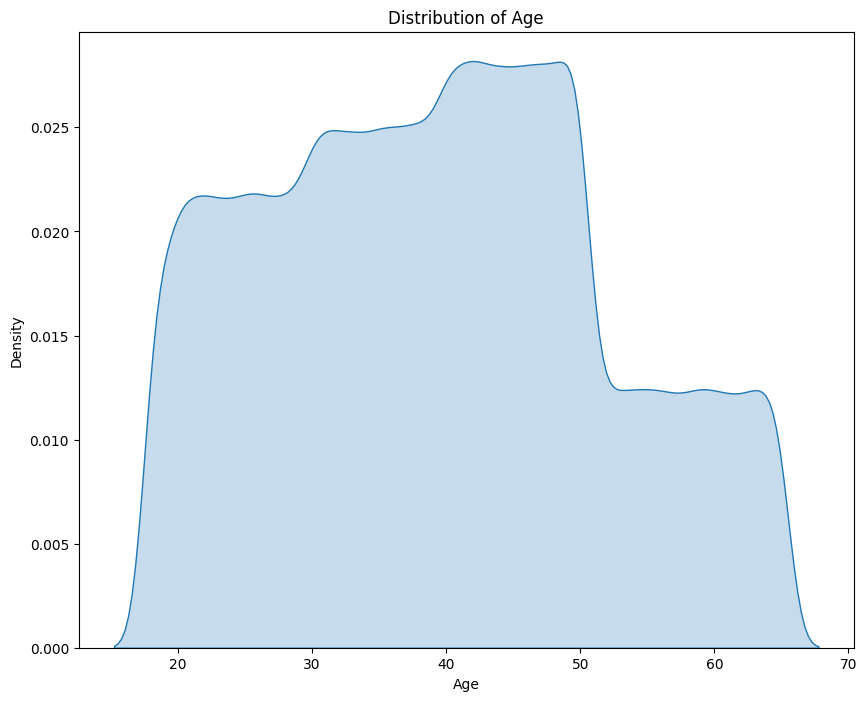

In [19]:
#Age distribution using kde plot
plt.figure(figsize=(10,8))
sns.kdeplot(data=train_data, x="Age", fill=True, palette="pastel")
plt.title("Distribution of Age")
plt.show()

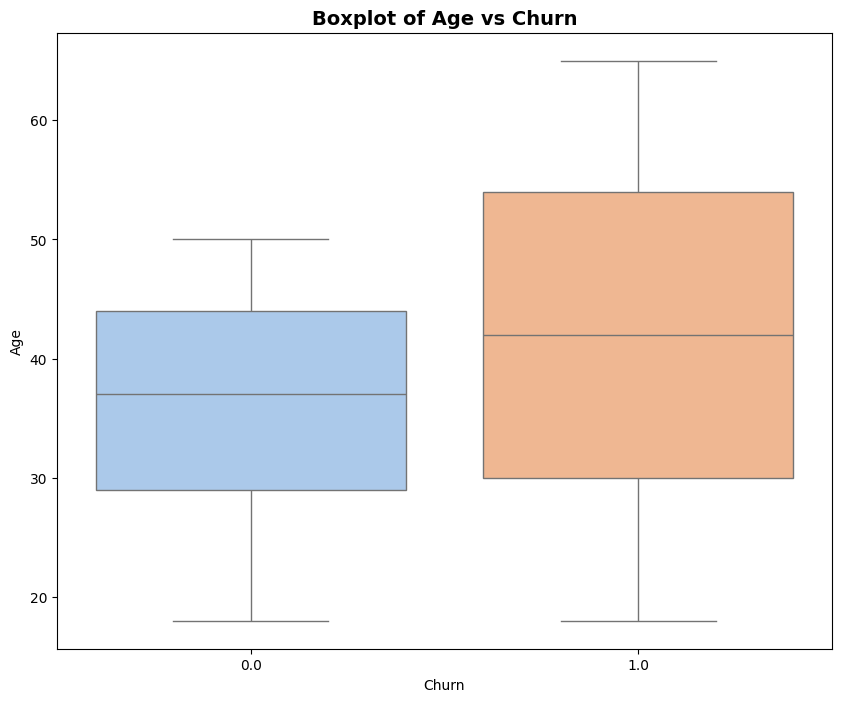

In [20]:
#Box plot according to churn status
plt.figure(figsize=(10,8))
sns.boxplot(data=train_data, x="Churn", y="Age", palette="pastel")
plt.title("Boxplot of Age vs Churn", fontweight="bold", fontsize=14)
plt.show()

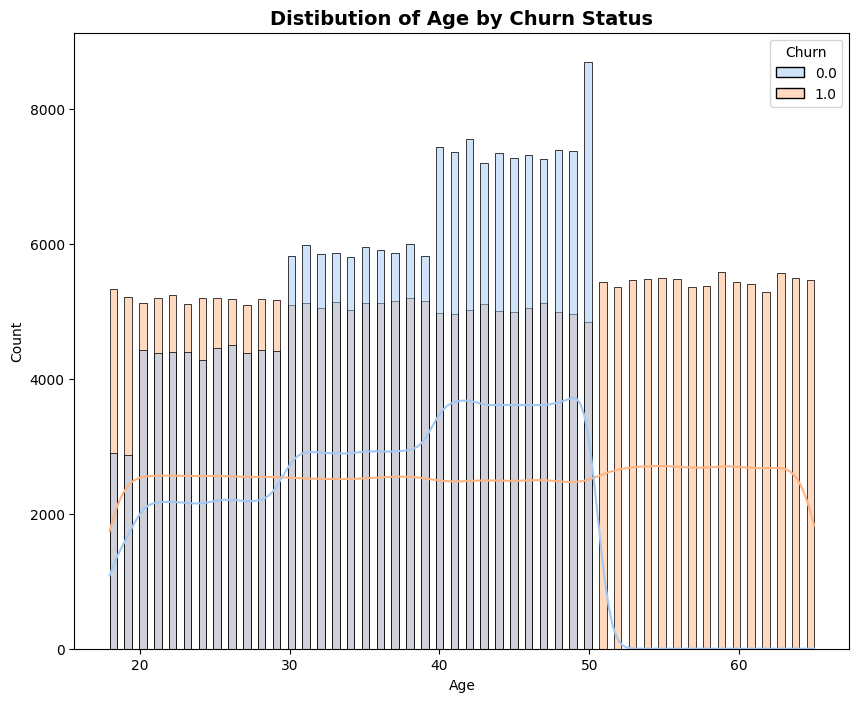

In [21]:
#Distribution according to churn status
plt.figure(figsize=(10,8))
sns.histplot(data=train_data, x="Age", hue="Churn", palette="pastel", kde=True)
plt.title("Distibution of Age by Churn Status", fontweight="bold", fontsize=14)
plt.show()

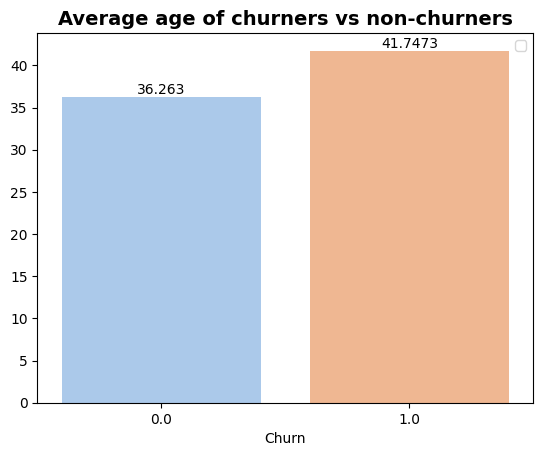

In [22]:
#Average age of churners vs non-churners
avg_age = train_data.groupby("Churn")["Age"].mean()
ax = sns.barplot(x=avg_age.index, y=avg_age.values, palette="pastel")
for container in ax.containers:
    ax.bar_label(container)

plt.title("Average age of churners vs non-churners", fontweight="bold", fontsize=14)
plt.legend()
plt.show()

**Observations**

1. Average age of customers who churn is higher than those who do not
2. Customers older than 50 always churn
3. The age of customers range from about 10 - 70
4. Customers between 30 - 50 years old are more likely to stay than churn.
5. The average age of a churner is 42


**GENDER VS CHURN RATE**


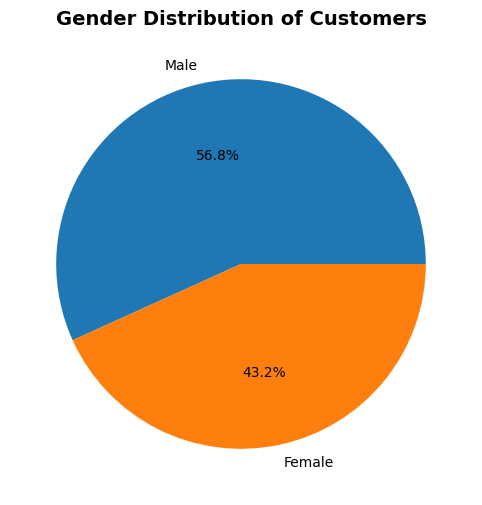

In [23]:
gender_count = train_data["Gender"].value_counts()
plt.figure(figsize=(8,6))
plt.pie(x=gender_count.values, labels=gender_count.index, autopct='%.1f%%')
plt.title("Gender Distribution of Customers", fontweight="bold", fontsize=14)
plt.show()

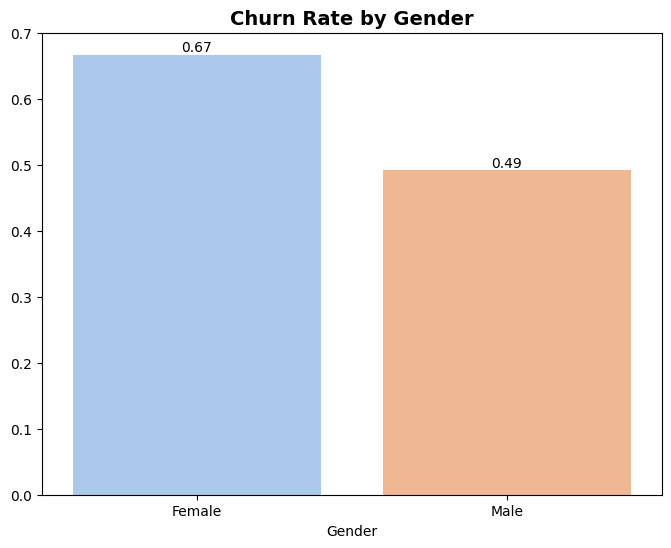

In [24]:
#Churn rate by gender
gender_churn_rate = train_data.groupby("Gender")["Churn"].mean()
plt.figure(figsize=(8,6))
ax = sns.barplot(x=gender_churn_rate.index, y=gender_churn_rate.values, palette="pastel")
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.title("Churn Rate by Gender", fontweight="bold", fontsize=14)
plt.show()

**Observations**
1. There are more male customers, but the churn rate of the female customers is higher.

**TENURE VS CHURN RATE**

In [25]:
train_data['Tenure_group'] = pd.qcut(train_data["Tenure"],q=4, labels=["Short Term", "Medium Term", "Long Term", "Very Long Term"])
train_data[["Tenure","Tenure_group"]].sample(10)


,Tenure,Tenure_group
266428,51.0,Very Long Term
340705,51.0,Very Long Term
72105,27.0,Medium Term
182320,20.0,Medium Term
277587,7.0,Short Term
207961,36.0,Long Term
208832,21.0,Medium Term
2463,4.0,Short Term
198124,27.0,Medium Term
197271,56.0,Very Long Term


In [26]:
train_data.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage_Frequency',
       'Support_Calls', 'Payment_Delay', 'Subscription_Type',
       'Contract_Length', 'Total_Spend', 'Last_Interaction', 'Churn',
       'Tenure_group'],
      dtype='object')

In [27]:
train_data.drop("Tenure_group", axis=1, inplace=True)

In [28]:
#Churn rate by tenure
# tenure_group_churn_rate = train_data.groupby("Tenure_group")["Churn"].mean()
# tenure_churn_rate = train_data.groupby("Tenure")["Churn"].mean()
# n_rows, n_cols = 1, 2
# label = ["Churn Rate by Tenure", "Churn Rate by Tenure Group"]
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(42,20))
# axes = axes.flatten()
# for i, tenu in enumerate([tenure_churn_rate,tenure_group_churn_rate]):
#     sns.barplot(x=tenu.index, y=tenu.values, palette='pastel', ax=axes[i])
#     axes[i].set_title(f"Churn Rate by {label[1-i]}")
#     for container in axes[i].containers:
#         axes[i].bar_label(container, fmt='%.2f', fontsize=15)
# plt.tight_layout()
# plt.show()





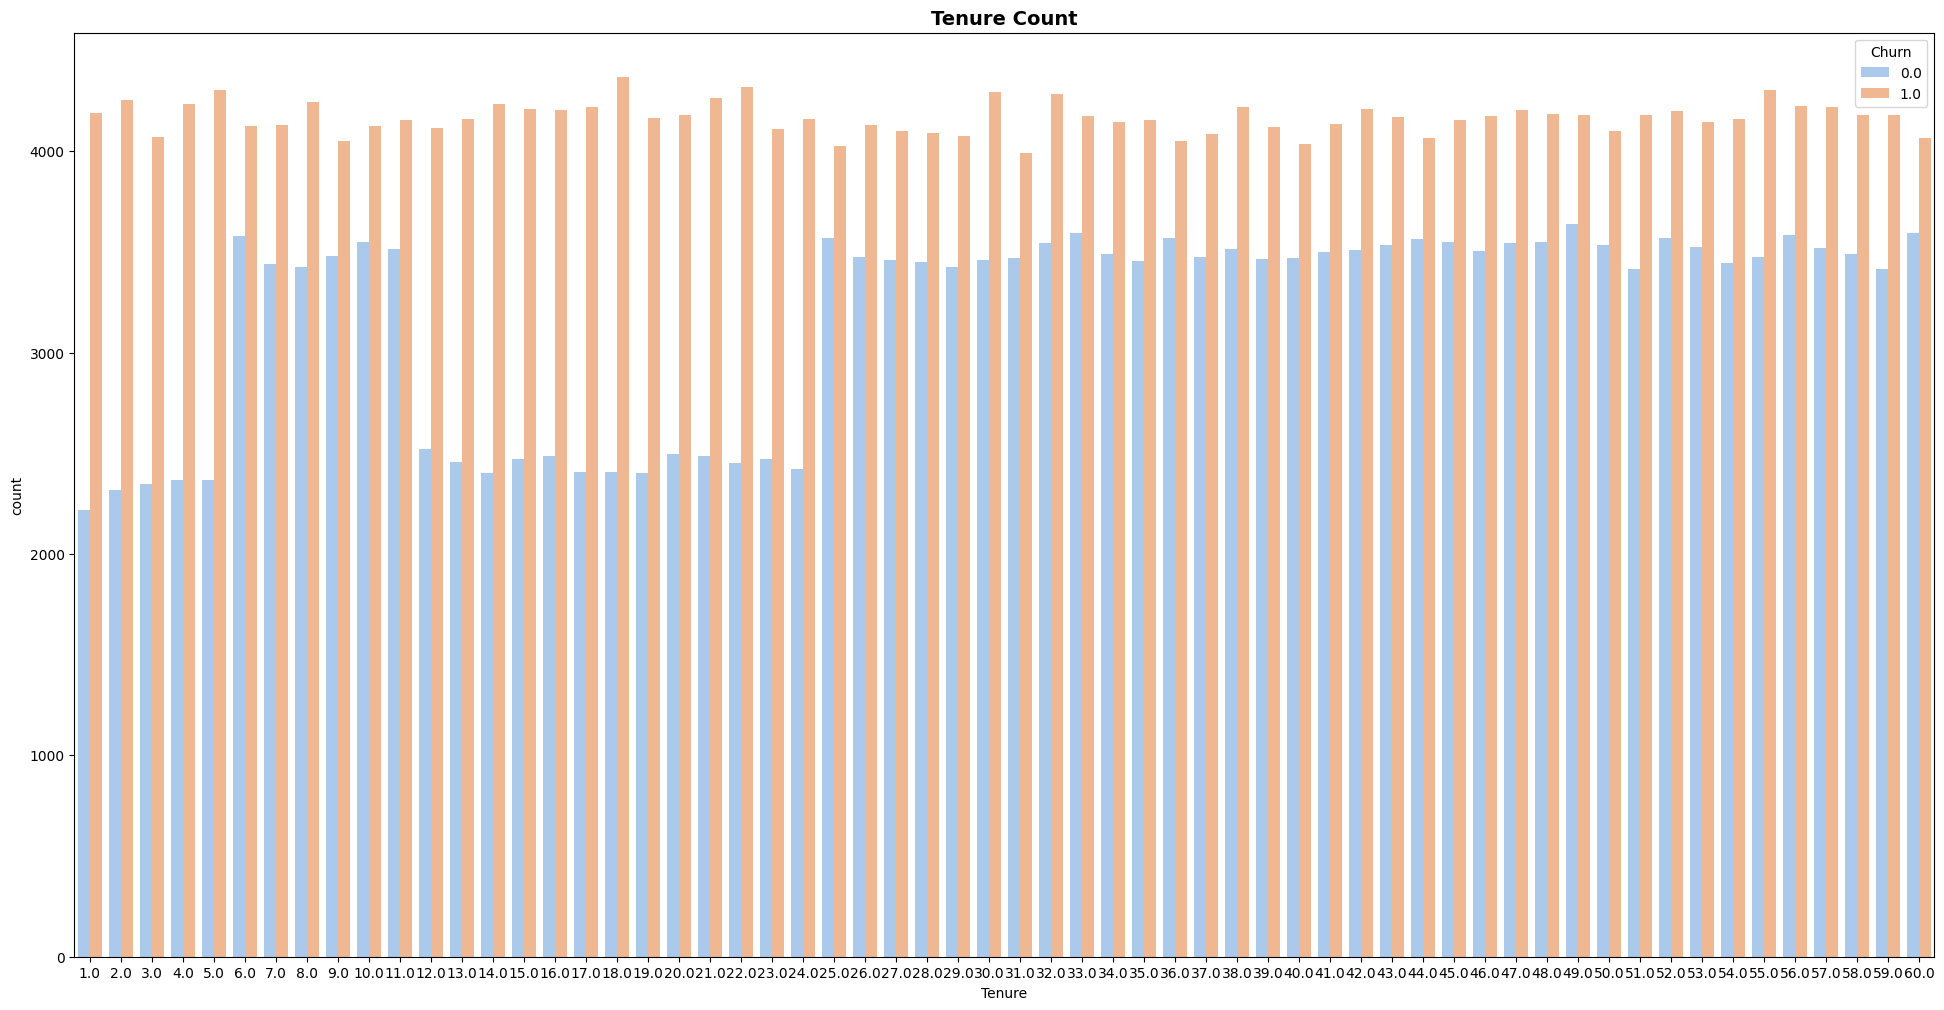

In [29]:
#Count plot by churn
plt.figure(figsize=(24,12))
sns.countplot(data=train_data, x="Tenure", hue="Churn", palette="pastel")
plt.title("Tenure Count", fontweight="bold", fontsize=14)
plt.show()

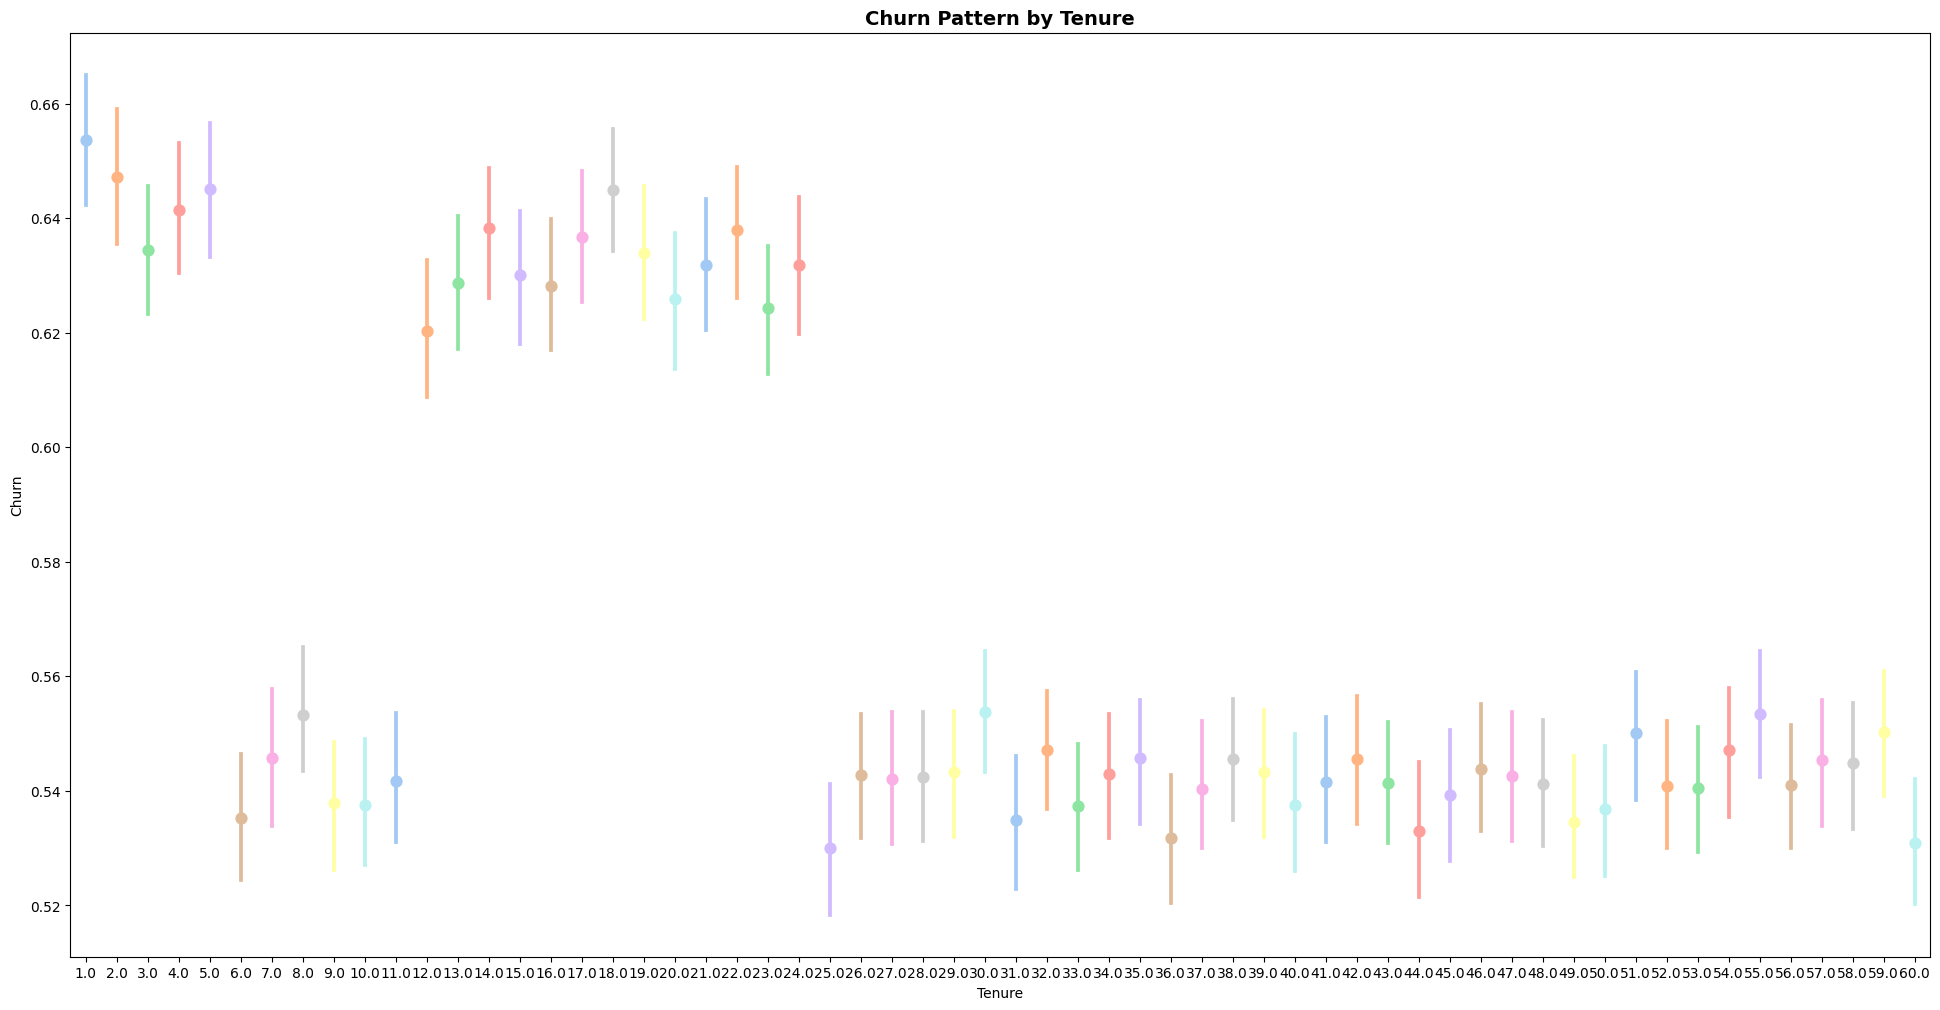

In [30]:
plt.figure(figsize=(24,12))
sns.pointplot(data=train_data, x="Tenure", y="Churn", palette="pastel")
plt.title("Churn Pattern by Tenure", fontweight="bold", fontsize=14)
plt.show()

**Observation**
1. Customers with longer tenures tend to churn less, as well as customers with tenure periods of 6-11 years


**USAGE FREQUENCY VS CHURN RATE**

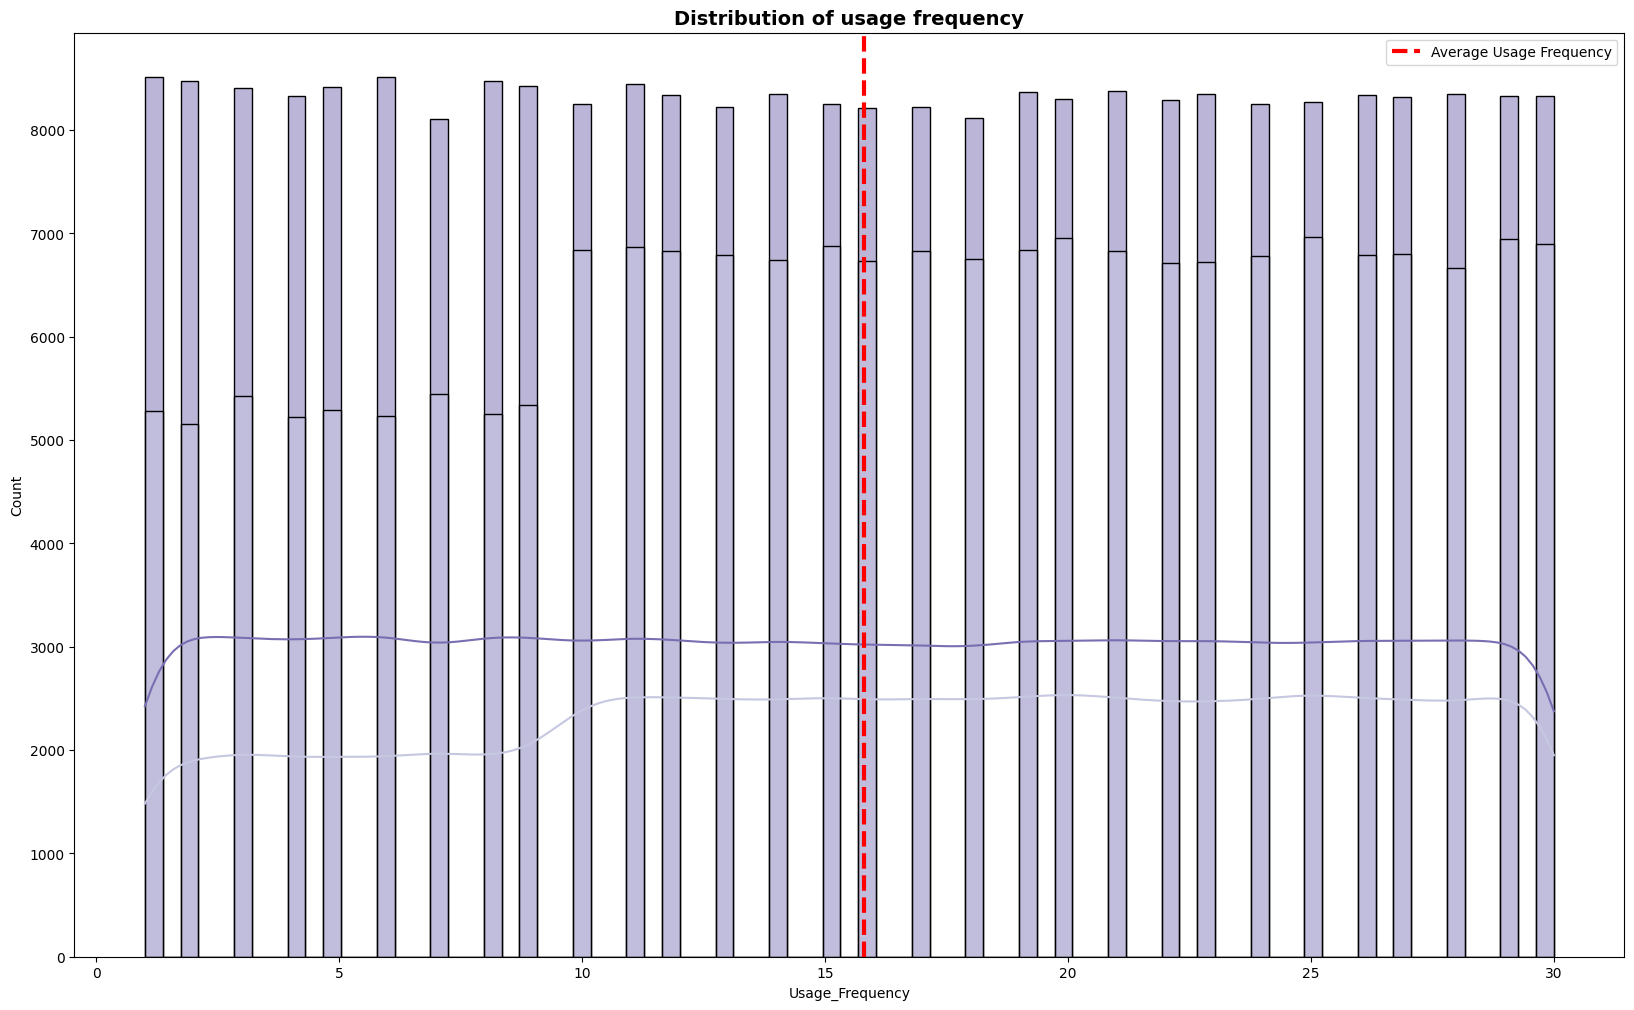

In [31]:
#Distribution of usage frequency
avg_use = train_data["Usage_Frequency"].mean()
plt.figure(figsize=(20,12))
sns.histplot(data=train_data, x="Usage_Frequency",hue="Churn", palette="Purples", kde=True)
plt.axvline(avg_use, color="red", linewidth=3, linestyle="dashed", label="Average Usage Frequency")
plt.title("Distribution of usage frequency", fontweight="bold", fontsize=14)
plt.legend()
plt.show()

**Observations**
1. The usage frequency has a uniform distribution
2. The Churn rate seems to not be affected by the usage frequency.



**SUPPORT CALLS VS CHURN**

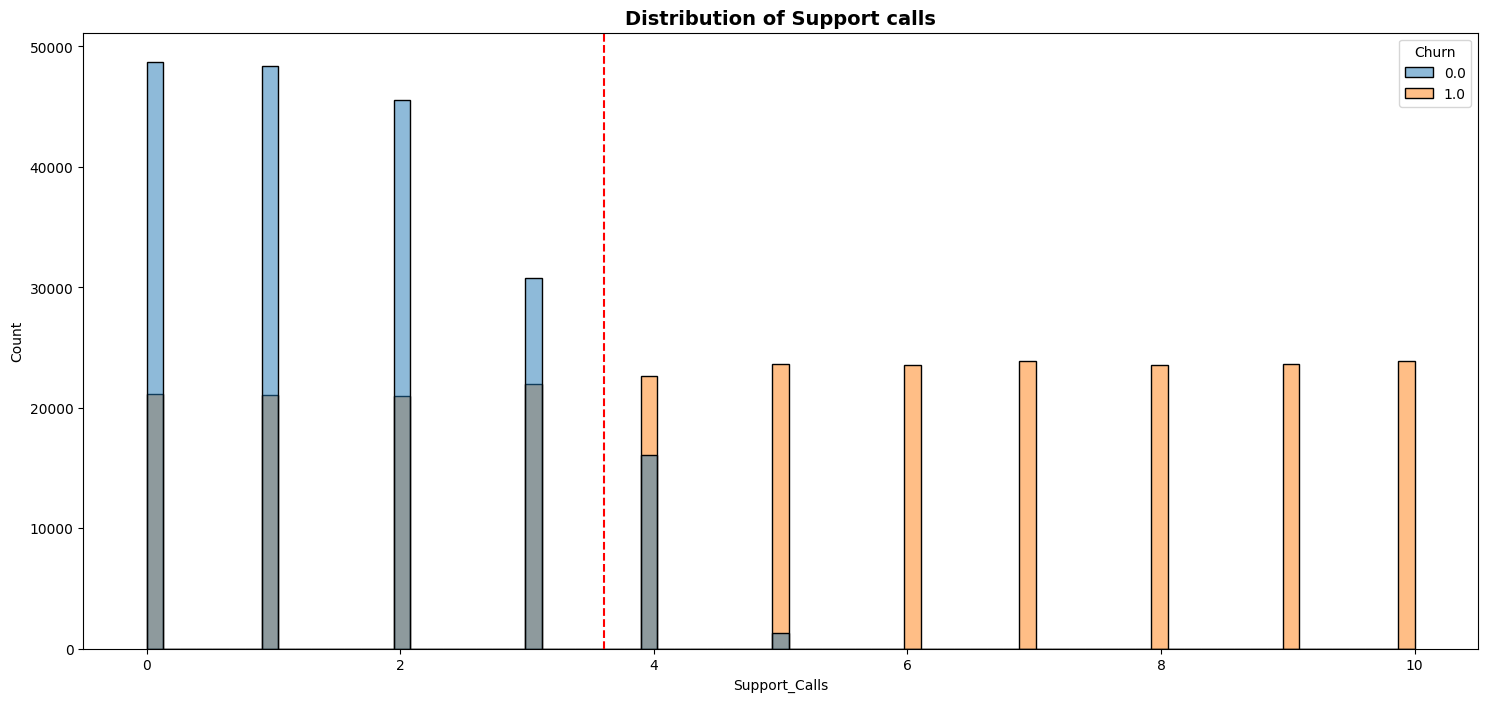

In [32]:
#Histogram for support call
plt.figure(figsize=(18,8))
sns.histplot(data=train_data, x="Support_Calls", hue="Churn")
plt.axvline(train_data["Support_Calls"].mean(), linestyle="dashed", color="r", label="Average Support Calls")
plt.title("Distribution of Support calls", fontweight="bold", fontsize=14)
plt.show()

**Observations**
1. Customers who made more calls had a higher churn rate.
2. On average, customers made 4 calls
3. Support calls are higher from 0-3 calls, and seem to be successful, more calls than that, customers seem to churn, indicating that supporters are not able to address the customer's problems.


**PAYMENT DELAY VS CHURN**

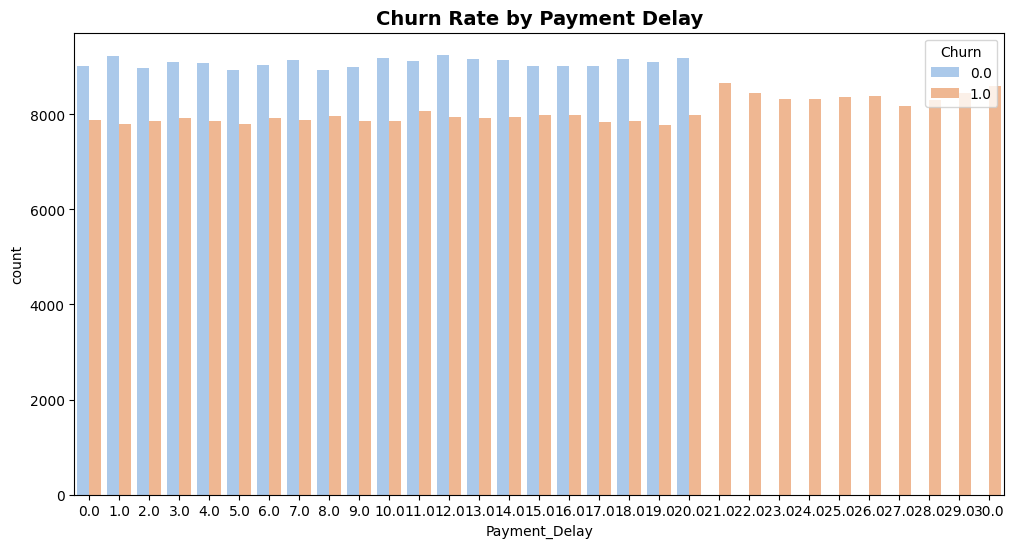

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(data=train_data, x="Payment_Delay", hue="Churn", palette="pastel")
plt.title("Churn Rate by Payment Delay", fontweight="bold", fontsize=14)
plt.show()

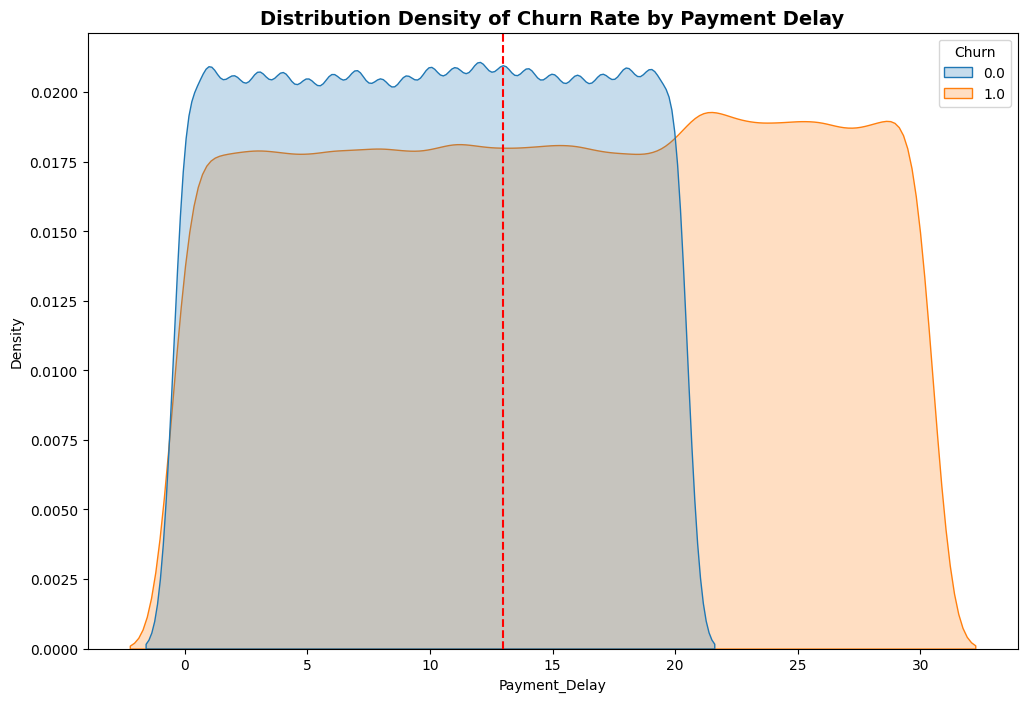

In [34]:
#kde plot
plt.figure(figsize=(12,8))
sns.kdeplot(data=train_data, x="Payment_Delay", fill=True, hue="Churn")
plt.axvline(train_data["Payment_Delay"].mean(), color="r", linestyle="dashed", label="Average Payment Delay")
plt.title("Distribution Density of Churn Rate by Payment Delay", fontweight="bold", fontsize=14)
plt.show()

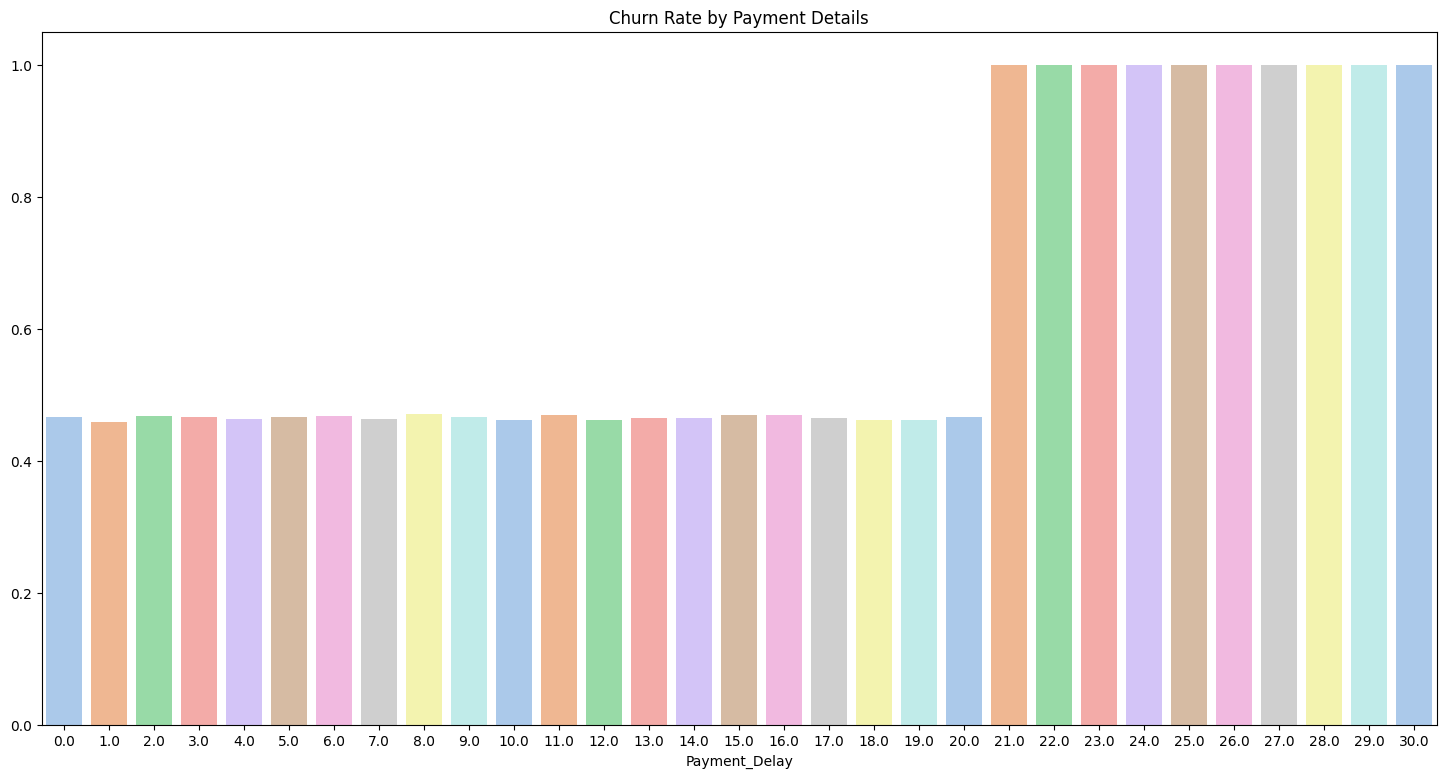

In [35]:
pay_churn_rate = train_data.groupby("Payment_Delay")["Churn"].mean()

plt.figure(figsize=(18,9))
sns.barplot(x=pay_churn_rate.index, y=pay_churn_rate.values, palette="pastel")
plt.title("Churn Rate by Payment Details")
plt.show()

**Observations**
1. A customer delaying payment for more than 20 months is mostly likely to churn
2. The averahe payment delay is about 13 days.

In [36]:
train_data["Payment_Delay"].nunique()

31

**SUBSCRIPTION TYPE VS CHURN**

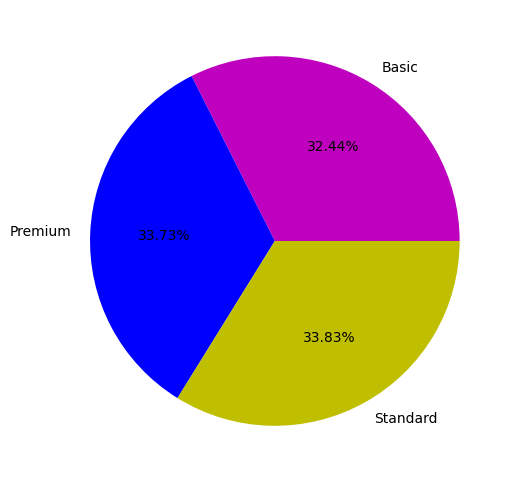

In [37]:
#Proportions of Subscription Type
sub_total=train_data.groupby("Subscription_Type")["CustomerID"].count()
plt.figure(figsize=(6,6))
plt.pie(x=sub_total.values, labels=sub_total.index, autopct="%.2f%%", colors=["m","b", "y"])
plt.show()

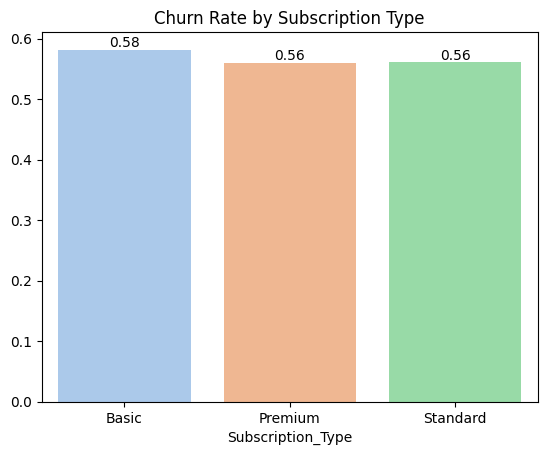

In [38]:
#Churn Rate by Subscription Type
subs_churn_rate = train_data.groupby("Subscription_Type")["Churn"].mean()
ax = sns.barplot(x=subs_churn_rate.index,y=subs_churn_rate.values, palette="pastel")
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.title("Churn Rate by Subscription Type")
plt.show()

### Observations
1. The churn rate of basic subscribers is slightly higher than premium and standard who have the same churn rate.
2. All subscription types have almost equal number of customers.

### CONTRACT LENGTH VS CHURN RATE


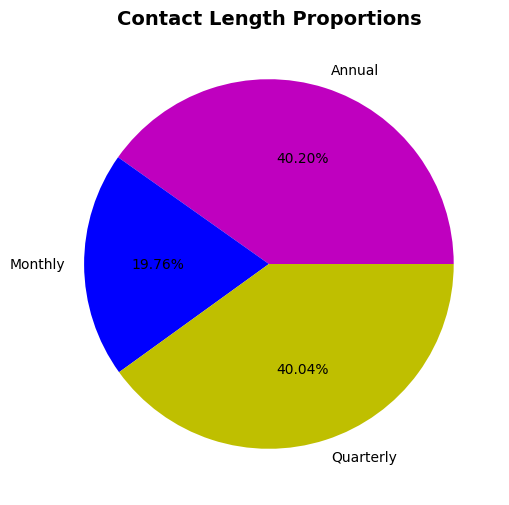

In [39]:
contract_proportions = train_data.groupby("Contract_Length")["CustomerID"].count()
plt.figure(figsize=(10,6))
plt.pie(x=contract_proportions.values, labels=contract_proportions.index, autopct="%.2f%%", colors=["m","b","y"])
plt.title("Contact Length Proportions", fontweight="bold", fontsize=14)
plt.show()

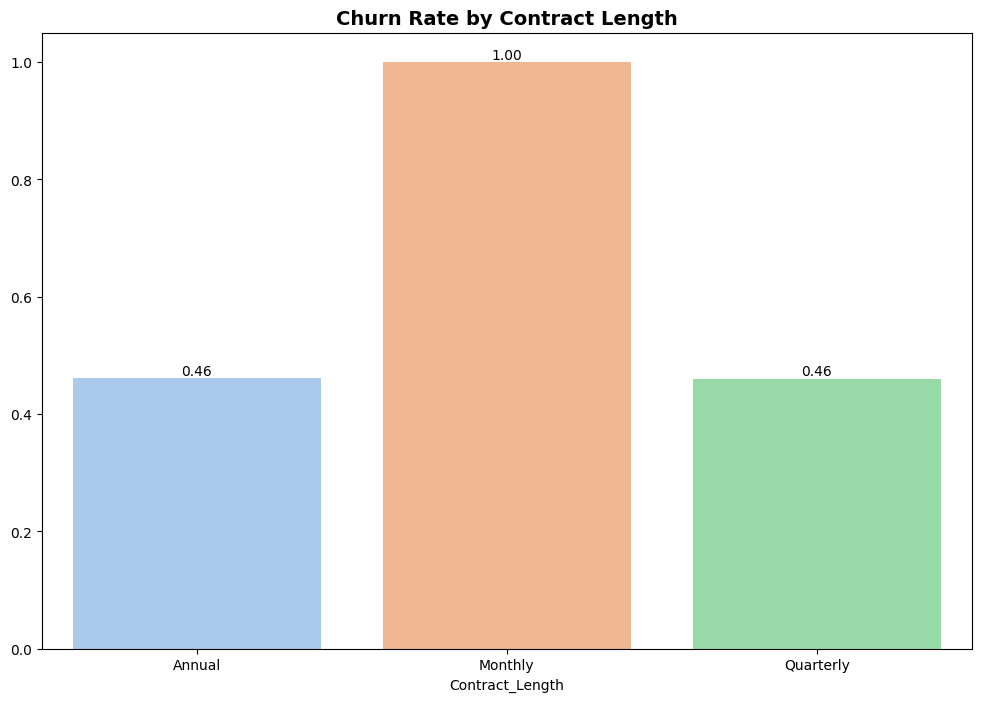

In [40]:
#Churn rate by contract length
churn_contract_length = train_data.groupby("Contract_Length")["Churn"].mean()
plt.figure(figsize=(12,8))
ax = sns.barplot(x=churn_contract_length.index, y=churn_contract_length.values, palette="pastel")
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.title("Churn Rate by Contract Length", fontweight="bold", fontsize=14)
plt.show()

### Observations
1. There are much less monthly subscribers than there are quarterly and annual
2. The churn rate of monthly subscribers is much higher.

#### TOTAL SPEND

In [41]:
### TOTAL SPEND
total_expenditure = train_data["Total_Spend"].sum()
print(f"Total Expenditure is {total_expenditure}")

Total Expenditure is 278436642.7200001


In [42]:
#Average spend
average_spend = train_data["Total_Spend"].mean()
print(f"The average total spend is {average_spend}")

The average total spend is 631.6162227787459


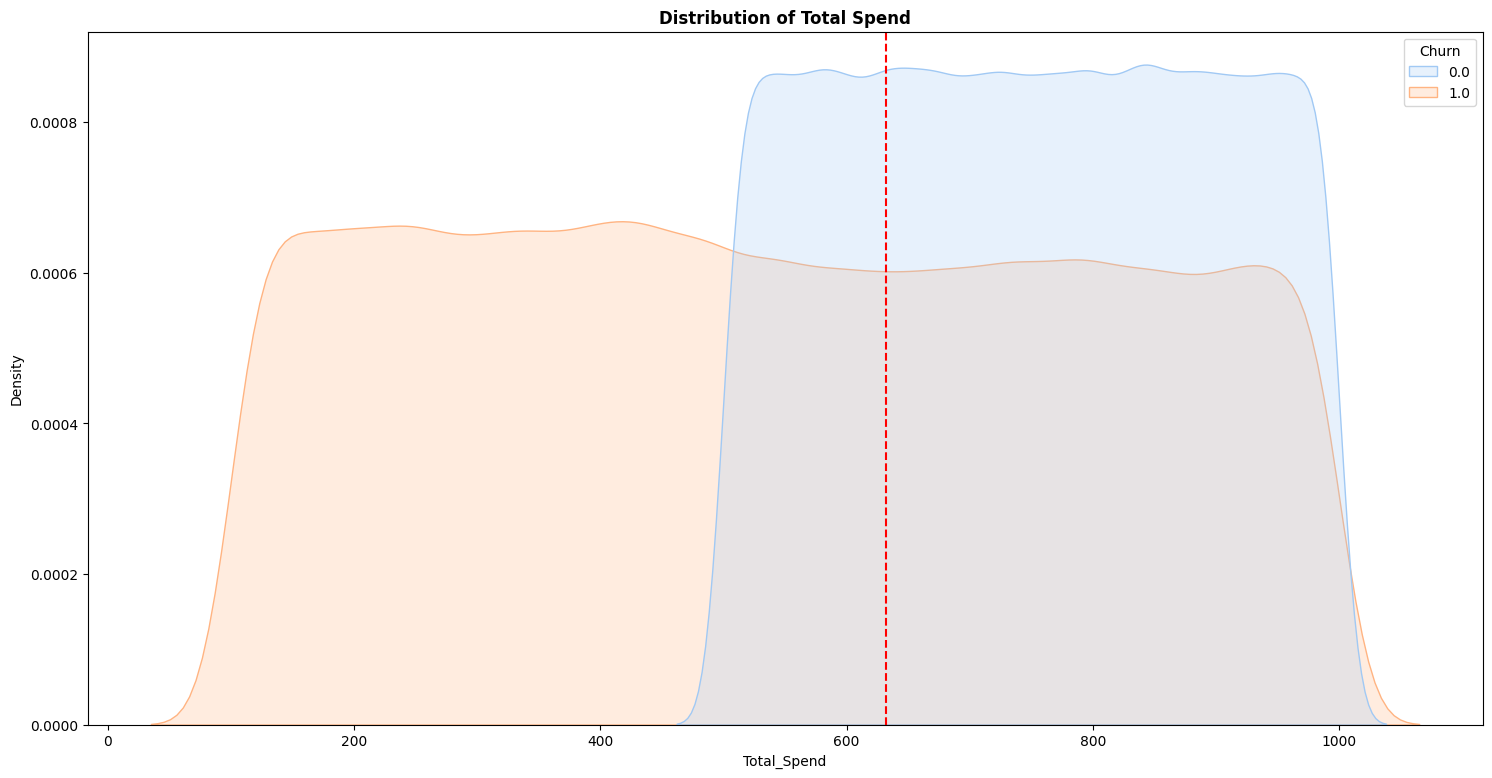

In [43]:
#Distribution for total spend
plt.figure(figsize=(18,9))
sns.kdeplot(data=train_data, x="Total_Spend", fill=True, palette="pastel", hue="Churn")
plt.axvline(train_data["Total_Spend"].mean(), linestyle="dashed", color="r")
plt.title("Distribution of Total Spend", fontweight="bold", fontsize=12)
plt.show()

### Observation
1. The average total spend is about 630
2. Pople who spend less(monthly subscribers) have a higher churn rate, customers with a total spend of more than 500 churn less

### LAST INTERACTION


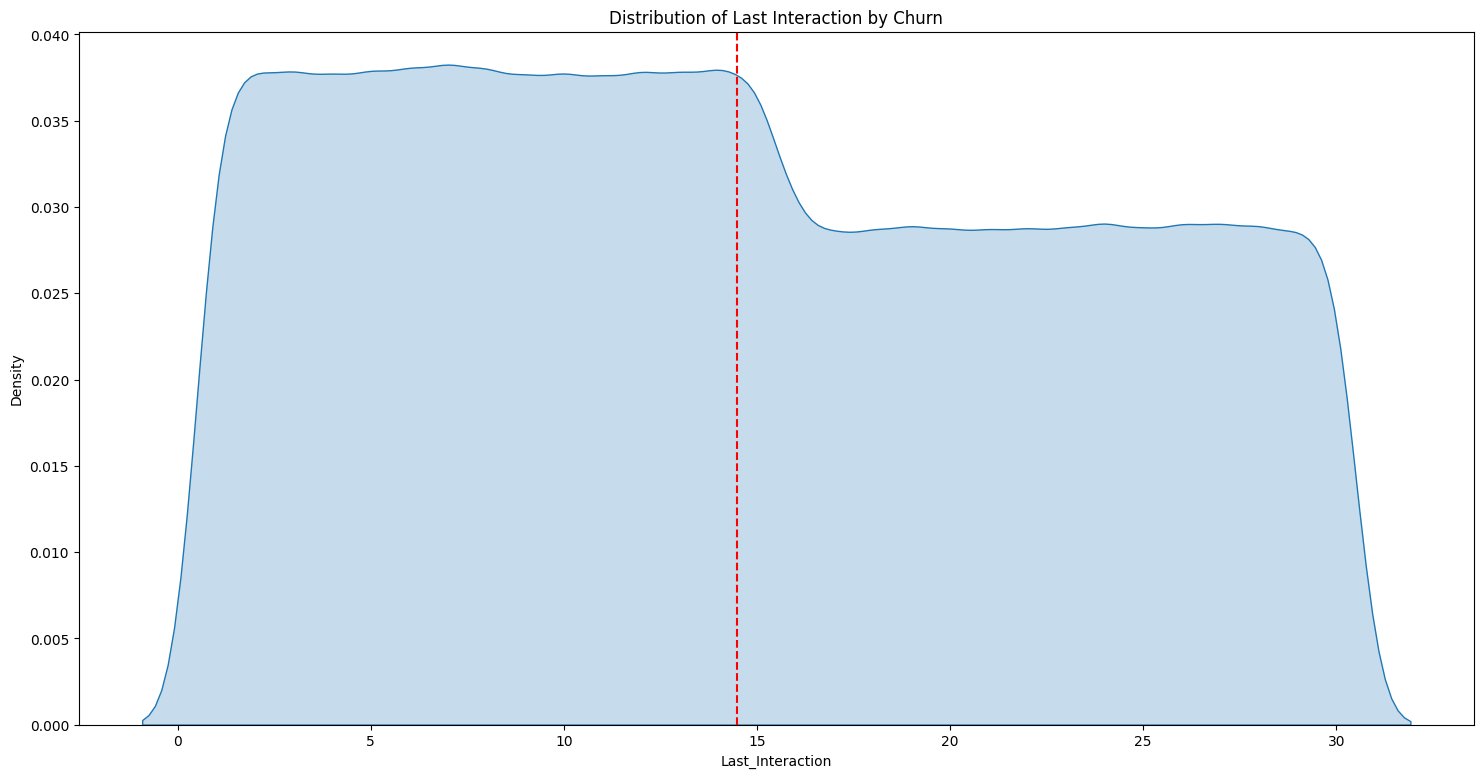

In [44]:
#Distribution
plt.figure(figsize=(18,9))
sns.kdeplot(data=train_data, x="Last_Interaction", palette="pastel", fill=True)
plt.axvline(train_data["Last_Interaction"].mean(), linestyle="dashed", color="r")
plt.title("Distribution of Last Interaction by Churn")
plt.show()

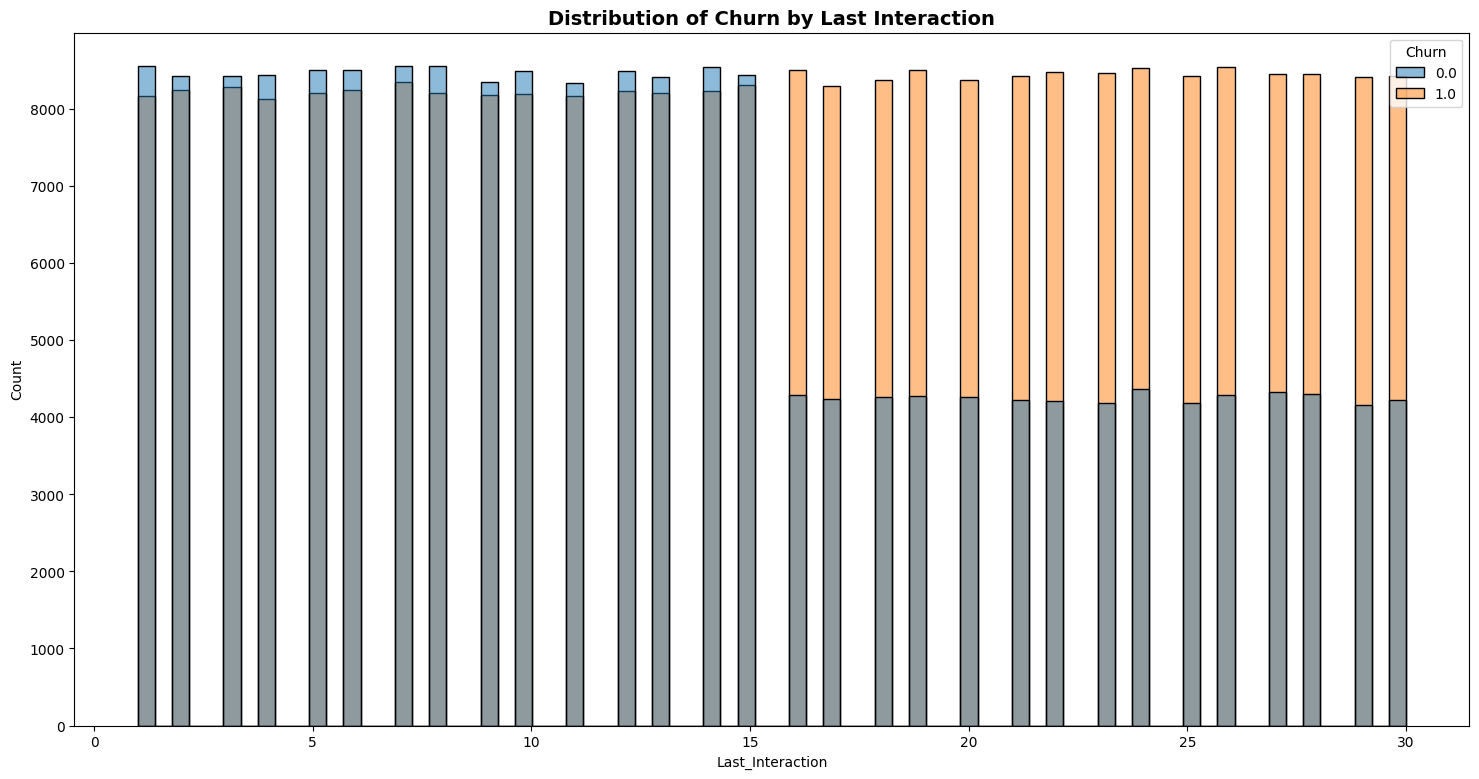

In [45]:
#Distribution of Last Interaction by Churn
plt.figure(figsize=(18,9))
sns.histplot(data=train_data, x="Last_Interaction", hue="Churn")
plt.title("Distribution of Churn by Last Interaction", fontweight="bold", fontsize=14)
plt.show()

### Observations
1. People who interacted more than 15 days ago have a higher churn rate than those who did more frequently. Customers who interacted more recently have a higher chance to stay.
2. The average last interaction is 14 days ago

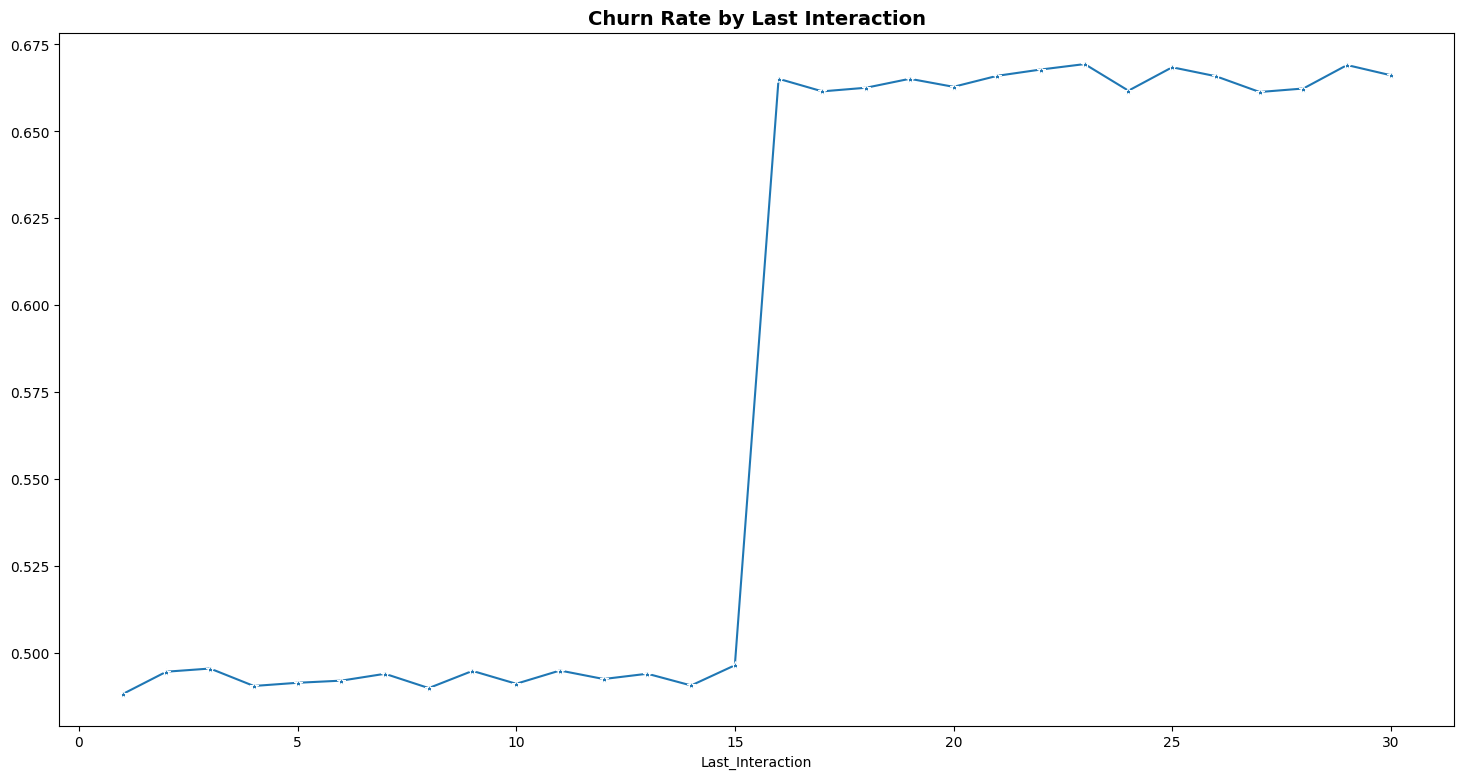

In [46]:
#Churn Rate by Last Interaction
churn_last_rate = train_data.groupby("Last_Interaction")["Churn"].mean()
plt.figure(figsize=(18,9))
sns.lineplot(x=churn_last_rate.index, y=churn_last_rate.values, marker="*",)
plt.title("Churn Rate by Last Interaction", fontweight="bold", fontsize=14)
plt.show()

### Observation
1. The probability of churning for customerss whose last interaction was more than 15 days ago is much higher, they are more likely to churn than customers with last interction of less than 15 days ago.


### CORRELATION ANALYSIS
#### NUMERICAL FEATURES CORRELATION

In [47]:
#Correlation for numerical features
# Spearson correlation -  the features are not normally distributed, no linear relationship

numerical_columns = train_data.select_dtypes(include="float64").columns.drop(["CustomerID","Churn"])
corr_matrix = train_data[numerical_columns].corr(method="spearman")
corr_matrix

,Age,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Total_Spend,Last_Interaction
Age,1.000000,-0.010277,-0.006081,0.168617,0.051443,-0.070357,0.025717
Tenure,-0.010277,1.000000,-0.026861,-0.027227,-0.015299,0.017218,-0.006705
Usage_Frequency,-0.006081,-0.026861,1.000000,-0.021184,-0.013381,0.017268,-0.004591
Support_Calls,0.168617,-0.027227,-0.021184,1.000000,0.146181,-0.199095,0.074629
Payment_Delay,0.051443,-0.015299,-0.013381,0.146181,1.000000,-0.104067,0.039330
Total_Spend,-0.070357,0.017218,0.017268,-0.199095,-0.104067,1.000000,-0.052410
Last_Interaction,0.025717,-0.006705,-0.004591,0.074629,0.039330,-0.052410,1.000000


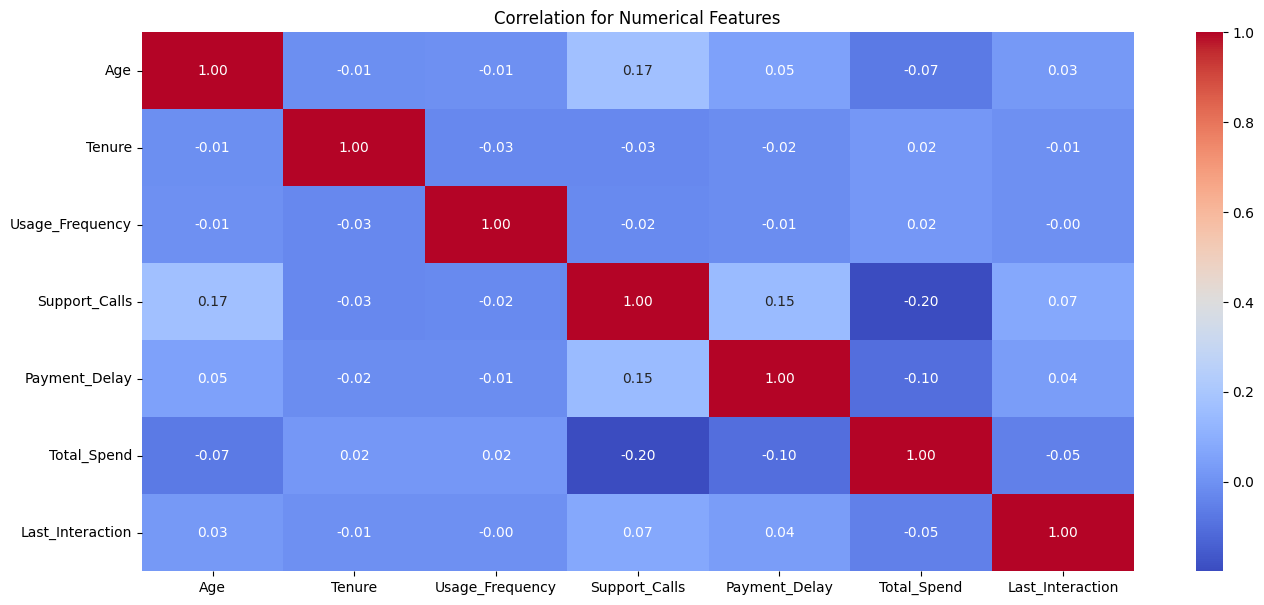

In [48]:
plt.figure(figsize=(16,7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation for Numerical Features")
plt.show()

#### Observations
1. Almost all correlations are close to 0:
2. It means there is low multicollinearity.
3. Features are largely independent


In [49]:
### Numerical and Categorical Correlation - Spearman Correlation
churn_corr = train_data[numerical_columns].corrwith(train_data["Churn"], method="spearman")
churn_corr=churn_corr.sort_values()
churn_corr

,0
Total_Spend,-0.398599
Tenure,-0.051647
Usage_Frequency,-0.045680
Last_Interaction,0.148576
Age,0.196159
Payment_Delay,0.288654
Support_Calls,0.558369


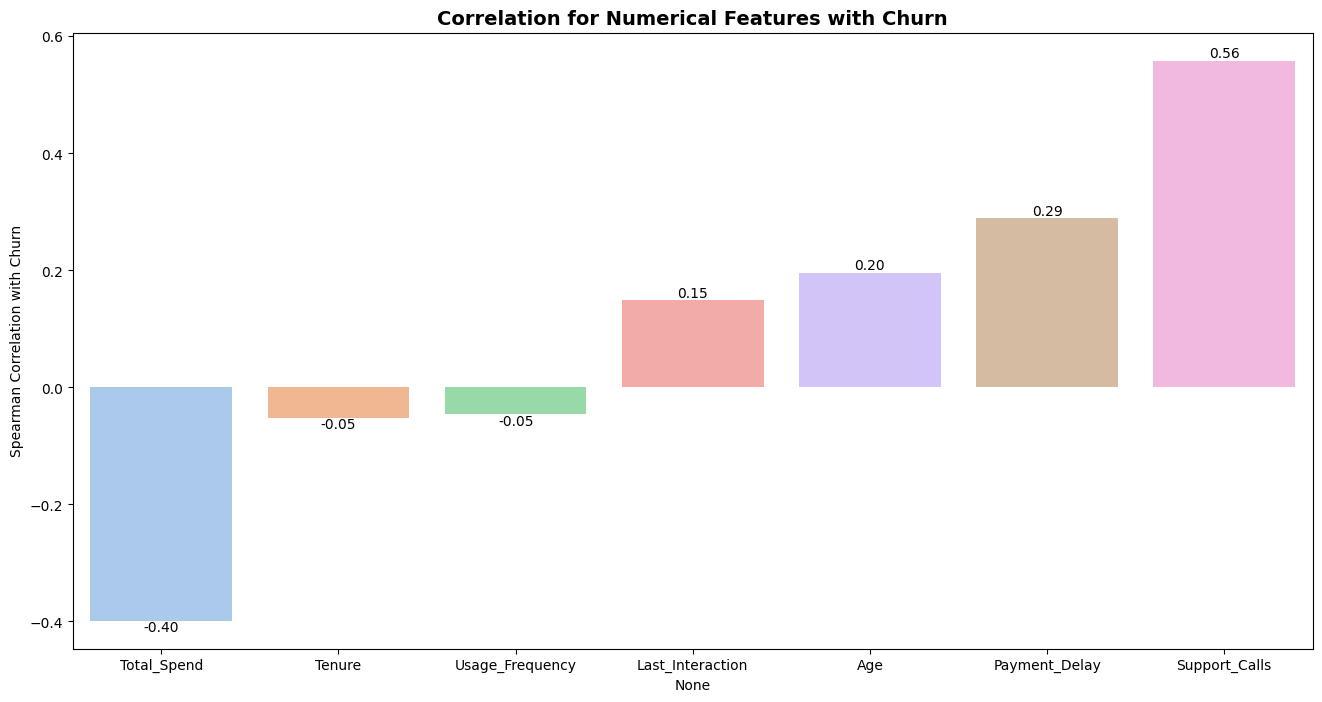

In [50]:
#Plotting into a barplot
plt.figure(figsize=(16,8))
ax = sns.barplot(x= churn_corr.index,y=churn_corr.values, palette="pastel")
for container in ax.containers:
    ax.bar_label(container, fmt='%0.2f')
plt.title("Correlation for Numerical Features with Churn", fontweight="bold", fontsize=14)
plt.ylabel("Spearman Correlation with Churn")
plt.show()

#### Observations
1. Customers who make more support calls are more likely to churn, churn is a strong feature for prediction: High support call volume reflects unresolved issues, dissatisfaction
2. Customers who spend more are less likely to churn: protect these customers with proactive retention offers.

#### CATEGORCAL AND BINARY TARGET-CHI SQUARED
1. Null hypothesis: There is no relationship between the variables(independent and dependent): they are indepenent
2. Alternative hypothesis: There is a relationship between them.
3. Contigency table:

In [51]:
from scipy.stats import chi2_contingency


In [52]:
def cramers_v(x,y):
    contigency = pd.crosstab(x,y)
    chi2 = chi2_contingency(contigency)[0]
    n = contigency.sum().sum()
    r,k = contigency.shape
    return np.sqrt(chi2/(n * (min(r,k) - 1)))

In [53]:
#Apply to categorical variables
cat_columns = train_data.select_dtypes(include="object").columns

cramers_results = {col: cramers_v(train_data[col], train_data["Churn"]) for col in cat_columns}
pd.Series(cramers_results).sort_values(ascending=False)

,0
Contract_Length,0.433553
Gender,0.175390
Subscription_Type,0.020553


### Observations
1. 0.43 suggests contract length is strongly associated with churn



#### **MODELLING**

In [54]:
X = train_data.drop(["Churn", "CustomerID"], axis=1)
y = train_data["Churn"]

In [55]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2 ,stratify=y, random_state=42)

In [56]:
y_train.mean(), y_test.mean()

(np.float64(0.5671075950264415), np.float64(0.5671056064060249))

In [57]:
num_features = ['Age', 'Tenure', 'Usage_Frequency', 'Support_Calls', 'Payment_Delay',
       'Total_Spend', 'Last_Interaction']
cat_features = ['Gender', 'Subscription_Type', 'Contract_Length']



In [58]:
#Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [59]:
preprocessor = ColumnTransformer(transformers=[("num", StandardScaler(), num_features),
                                               ("cat", OneHotEncoder(drop="first"), cat_features)])

In [60]:
#Building a
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

log_reg = Pipeline(steps=[("preprocessor", preprocessor),
                          ("model", LogisticRegression(max_iter=1000))])

In [61]:
log_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Tenure',
                                                   'Usage_Frequency',
                                                   'Support_Calls',
                                                   'Payment_Delay',
                                                   'Total_Spend',
                                                   'Last_Interaction']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender',
                                                   'Subscription_Type',
                                                   'Contract_Length'])])),
                ('model', LogisticRegression(max_iter=1000))])

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:,1]

In [63]:
#Report for logistic regression
print("Confusion_Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification_Report:\n", classification_report(y_test, y_pred))
print("\nROC_AUC_SCORE:\n", roc_auc_score(y_test, y_prob))

Confusion_Matrix:
 [[34494  3673]
 [ 5730 44270]]

Classification_Report:
               precision    recall  f1-score   support

         0.0       0.86      0.90      0.88     38167
         1.0       0.92      0.89      0.90     50000

    accuracy                           0.89     88167
   macro avg       0.89      0.89      0.89     88167
weighted avg       0.89      0.89      0.89     88167


ROC_AUC_SCORE:
 0.9590260455367201


In [64]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = Pipeline(steps=[("Preprocess", preprocessor),
              ("model", RandomForestClassifier(n_estimators=200, random_state=42))])

In [65]:
rf_classifier.fit(X_train, y_train)


Pipeline(steps=[('Preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Tenure',
                                                   'Usage_Frequency',
                                                   'Support_Calls',
                                                   'Payment_Delay',
                                                   'Total_Spend',
                                                   'Last_Interaction']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender',
                                                   'Subscription_Type',
                                                   'Contract_Length'])])),
                ('model',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [66]:
#Make predictons
y_pred_rf = rf_classifier.predict(X_test)

In [67]:
rf_prob = rf_classifier.predict_proba(X_test)[:,1]
roc_auc_score(y_test,rf_prob)

np.float64(0.9999989019309875)

#### FEATURE IMPORTANCE AND INTERPRETATION

In [68]:
feature_names = log_reg.named_steps["preprocessor"].get_feature_names_out()
coeffs = log_reg.named_steps["model"].coef_[0]
coeffs

array([ 0.44501471, -0.13610341, -0.12843121,  2.30255706,  0.9246753 ,
       -1.45651248,  0.5253005 , -1.14900092, -0.12230032, -0.12147631,
       10.07874817, -0.01264388])

In [69]:
#Create a dataframe of features and their coefficients
coef_df = pd.DataFrame({"Feature": feature_names,
                        "Coefficients": coeffs}).sort_values(by="Coefficients", key=abs, ascending=False)
coef_df

,Feature,Coefficients
10,cat__Contract_Length_Monthly,10.078748
3,num__Support_Calls,2.302557
5,num__Total_Spend,-1.456512
7,cat__Gender_Male,-1.149001
4,num__Payment_Delay,0.924675
6,num__Last_Interaction,0.525300
0,num__Age,0.445015
1,num__Tenure,-0.136103
2,num__Usage_Frequency,-0.128431
8,cat__Subscription_Type_Premium,-0.122300


In [70]:
feature_names = rf_classifier.named_steps["Preprocess"].get_feature_names_out()
importances = rf_classifier.named_steps["model"].feature_importances_

In [71]:
importances_df = pd.DataFrame({"Feature_names": feature_names,
                               "Importance": importances}).sort_values(by="Importance", ascending=False, key=abs)
importances_df

,Feature_names,Importance
3,num__Support_Calls,0.299097
5,num__Total_Spend,0.211239
0,num__Age,0.144173
10,cat__Contract_Length_Monthly,0.133626
4,num__Payment_Delay,0.119905
6,num__Last_Interaction,0.036539
7,cat__Gender_Male,0.033419
1,num__Tenure,0.009359
11,cat__Contract_Length_Quarterly,0.006864
2,num__Usage_Frequency,0.003912


### COMMENTS
1. High recall here is critical: of all customers who churned, how many did the model catch?
2. High Precision: Of all cusomers who got flagged as churners, how mnay actually churned?
  - Importance for market cost control and not spamming customers.
3. F1-SCORE: balanced between precision and recall.
4. ROC-AUC": How well can the model rank churners above non-churners across all thresholds.

In [72]:
#Plotting the ROC-AUC curve
test_df = pd.DataFrame({"True": y_test, "Logistic": y_prob, "RandomForest": rf_prob})
test_df.head()

,True,Logistic,RandomForest
30086,1.0,0.999998,1.000
368225,0.0,0.053794,0.000
146939,1.0,0.952156,1.000
368276,0.0,0.006981,0.005
153765,1.0,0.067501,0.840


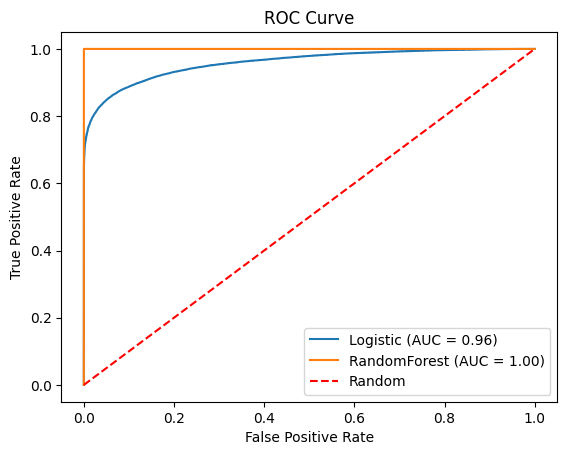

In [73]:
from sklearn.metrics import roc_curve, auc
models = ["Logistic", "RandomForest"]

for model in models:
  fpr, tpr, _ = roc_curve(test_df["True"], test_df[model])
  roc_auc = auc(fpr,tpr)
  plt.plot(fpr, tpr, label=f"{model} (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1], linestyle="--", color="r", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### CROSS VALIDATION

In [74]:
# from sklearn.model_selection import cross_val_score, StratifiedKFold

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# roc_scores = cross_val_score(rf_classifier, X,y, cv=cv, scoring="roc_auc")


In [75]:
# roc_scores, roc_scores.mean(), roc_scores.std()

In [76]:
# roc_scores_lg = cross_val_score(log_reg, X,y, cv=cv, scoring="roc_auc")
# roc_scores_lg

In [77]:
# roc_scores_lg, roc_scores_lg.mean(), roc_scores_lg.std()

Cross validates evaluates how well a model generalizes, it does this by computing the roc scores of a model across a number of stratified splits, to reveal model stability.

1.   Here, random forest is a better model as it has a mean of roc score, showing it ranks churners above non churners well, therefore better at distinguishing the two groups.
2.   Has a lower variance showing better generalization, it is therefore a better predictor compared to logistic regression(this is because the stronger feature predictors have a non-linear relationship with the target variable)



### HYPERPARAMETER TUNING-RANDOMIZEDSEARCH

In [78]:
# from sklearn.model_selection import RandomizedSearchCV

# param_dist = {"model__n_estimators": [200,300,500],
#               "model__max_depth": [None, 5,10,20],
#               "model__min_samples_split": [2,5,10],
#               "model__min_samples_leaf": [1,2,5],
#               "model__max_features": ["sqrt", "log2"]}

In [79]:
# rf_search= RandomizedSearchCV(rf_classifier,
#                               param_distributions=param_dist,
#                               n_iter=20,
#                               scoring="roc_auc",
#                               cv=cv,
#                               n_jobs=-1,
#                               random_state=42)
# rf_search.fit(X_train, y_train)

In [80]:
# rf_search.best_score_

In [81]:
# rf_search.best_params_

In [82]:
# best_rf = rf_search.best_estimator_

In [83]:
# y_proba_rf_tuned = best_rf.predict_proba(X_test)[:,1]
# roc_auc_score(y_test,y_proba_rf_tuned)

In [84]:
# y_test_pred_brf = best_rf.predict(X_test)
# print(classification_report(y_test, y_test_pred_brf))

In [85]:
# confusion_matrix(y_test, y_test_pred_brf)

In [86]:
# #ROC-AUC-CURVE
# fpr,tpr,_ = roc_curve(y_test, y_proba_rf_tuned)
# plt.figure(figsize=(12,8))
# plt.plot(fpr,tpr, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf_tuned):.2f})")
# plt.plot([0,1], [0,1], linestyle='--')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.legend()
# plt.title("ROC Curve")
# plt.show()

In [87]:
# importances = pd.Series(best_rf.named_steps['model'].feature_importances_, index=feature_names).sort_values(ascending=False)
# importances.head(10)

In [88]:
# import pickle
# with open('tuned_rf_model.pkl', 'wb') as file:
#     pickle.dump(best_rf, file)

In [89]:
# import joblib
# from google.colab import files

# joblib.dump(best_rf, 'tuned_rf_model.joblib')
# files.download('tuned_rf_model.joblib')

The initial Random Forest model achieved near-perfect ROC-AUC scores (0.999) across training, cross-validation and after hyperparameter tuning. Such performance is unusual for real-world churn prediction problems and suggests the presence of target leakage or feature encoding post-churn behavior.

To assess this, we retrain the model after excluding features that may encode oucomes rather than predictive signals available before churn occurs.

In [90]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage_Frequency    440832 non-null  float64
 5   Support_Calls      440832 non-null  float64
 6   Payment_Delay      440832 non-null  float64
 7   Subscription_Type  440832 non-null  object 
 8   Contract_Length    440832 non-null  object 
 9   Total_Spend        440832 non-null  float64
 10  Last_Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 43.7+ MB


In [91]:
X_no_leak = train_data.drop(["Churn", "CustomerID", "Payment_Delay", "Last_Interaction"], axis=1)
y_no_leak = train_data["Churn"]

In [92]:
num_col_leak = train_data.select_dtypes(include="float64").columns.drop(["CustomerID","Payment_Delay","Last_Interaction", "Churn"])
cat_col_leak = train_data.select_dtypes(include="object").columns

In [93]:
#Resplitting the data
X_train_n1, X_test_n1, y_train_n1, y_test_n1 = train_test_split(X_no_leak,y_no_leak, stratify=y_no_leak, random_state=42, test_size=0.2)

In [94]:
preprocessor_n = ColumnTransformer(transformers=[
    ("scale", StandardScaler(), num_col_leak),
    ("encoding", OneHotEncoder(drop='first'), cat_col_leak)
])

In [95]:
rf_leak=Pipeline(steps=[("preprocess", preprocessor_n),
                         ("model", RandomForestClassifier(random_state=42, n_estimators=200, n_jobs=-1))])

In [96]:
rf_leak.fit(X_train_n1, y_train_n1)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  Index(['Age', 'Tenure', 'Usage_Frequency', 'Support_Calls', 'Total_Spend'], dtype='object')),
                                                 ('encoding',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['Gender', 'Subscription_Type', 'Contract_Length'], dtype='object'))])),
                ('model',
                 RandomForestClassifier(n_estimators=200, n_jobs=-1,
                                        random_state=42))])

In [97]:
y_pred_leak = rf_leak.predict(X_test_n1)
y_proba_leak = rf_leak.predict_proba(X_test_n1)[:,1]

In [98]:
#ROC-AUC SCORE
roc_auc_score_leak = roc_auc_score(y_test_n1, y_proba_leak)
roc_auc_score_leak


np.float64(0.9843277653470276)

ROC-AUC SCORE of 0.9843277653470276 means, 98.4% of the time, the churner is ranked higher than the non-churner

In [99]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_leak = cross_val_score(rf_leak, X_no_leak, y_no_leak, cv=cv, scoring="roc_auc", n_jobs=-1)

In [100]:
cv_scores_leak, cv_scores_leak.mean(), cv_scores_leak.std()

(array([0.9848226 , 0.98507109, 0.98506086, 0.98517176, 0.98498929]),
 np.float64(0.9850231205195359),
 np.float64(0.00011590620566566862))

**FINAL MODEL VALIDATION**

**1. Feature Selection**

During initial model training, the Random Forest classifier achieved an almost perfect ROC-AUC score (~0.9999) across training, cross-validation, and test sets. It raised concerns about potential data leakage.
After reviewing the feature definitions and their real-world meaning, it was identified that some variables were too closely aligned with the churn outcome, likely encoding post-event or outcome-adjacent information (e.g. customer behavior recorded after churn had effectively occurred).
To ensure a realistic and deployable model, these leakage-prone features were removed, and the model was retrained from scratch using only features that would be available at prediction time.

This step was critical to ensure that:
- Model performance reflects true predictive power
- Results generalize to unseen, real-world data
- Evaluation metrics are trustworthy

**2. Cross-Validation Performance (Post-Leakage)**

After retraining with leakage-controlled features, the model was evaluated using Stratified K-Fold Cross-Validation (5 folds) to preserve the churn class distribution across splits.
Cross-validation ROC-AUC scores:
[0.9848226 , 0.98507109, 0.98506086, 0.98517176, 0.98498929]
Mean ROC-AUC: ≈ 0.985
Variance: Very low

This indicates:
- Strong and consistent performance across folds
- No reliance on a particular train-test split
- Excellent generalization ability

**3. Final Hold-Out Test Performance**

The final model was evaluated on a completely unseen test set.
Test ROC-AUC: 0.9843
The test ROC-AUC is closely aligned with the cross-validation mean, which suggests:
- No overfitting
- No residual data leakage
- A stable and reliable model

**4. Model Reliability Summary Metric	ROC-AUC**

Cross-validation (mean)	~0.985
Hold-out test set	~0.984

The close agreement between cross-validation and test performance confirms that the model’s predictive power is both robust and realistic.

**5. Key Takeaway**

By identifying and removing leakage-prone features, the final model achieves a slightly lower but far more trustworthy performance. This trade-off prioritizes real-world applicability over artificially inflated metrics and results in a model that can confidently be used for churn prediction in practice.


After removing leakage_prone features, the model maintains excellent ROC-AUC score, with minimal cross-validation folds, indicating strong generalization.

In [101]:
features = rf_leak.named_steps['preprocess'].get_feature_names_out()
importances_leak = rf_leak.named_steps['model'].feature_importances_

In [102]:
feature_leak_df = pd.DataFrame({"Feature": features, "Importance": importances_leak}).sort_values(by="Importance", ascending=False, key=abs)
feature_leak_df


,Feature,Importance
3,scale__Support_Calls,0.335112
4,scale__Total_Spend,0.260838
0,scale__Age,0.184320
8,encoding__Contract_Length_Monthly,0.143287
1,scale__Tenure,0.032618
2,scale__Usage_Frequency,0.020087
5,encoding__Gender_Male,0.010359
9,encoding__Contract_Length_Quarterly,0.007624
7,encoding__Subscription_Type_Standard,0.002931
6,encoding__Subscription_Type_Premium,0.002824


The results indicate that churn is primarily driven by customer experience and engagement signals, rather than demographic characteristics.
1. Support calls - strongest predictor, highlighting customer interactions as an early warning indicator
2. Total spend - second stronger indicating that higher value customers are less likely to churn.
3. Age - showed notable importance, indication variation in churn behavior across age groups.
4. Monthly contract length - notablr importance, highlighting the stabilizing effect of longer-term commitments.
5. Gender, Subscription type, exhibits minimal influence.

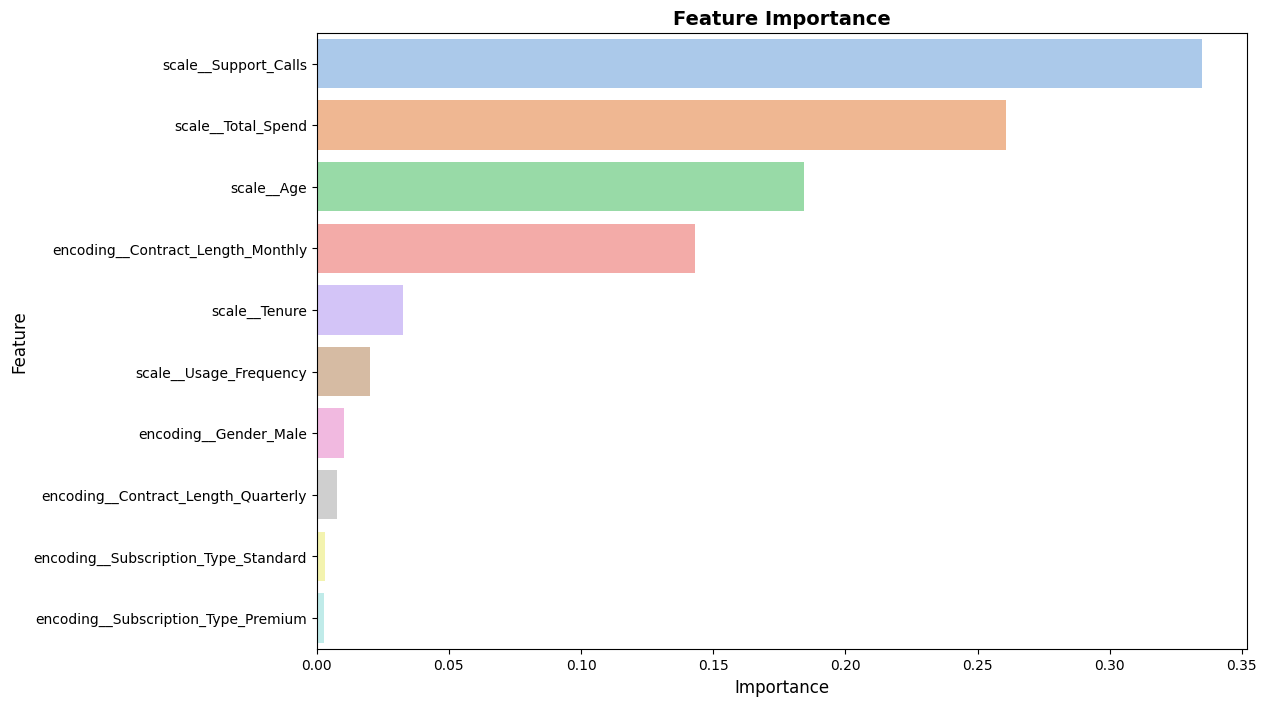

In [103]:
#Visualize the feature importance
plt.figure(figsize=(12,8))
sns.barplot(data=feature_leak_df, x="Importance", y="Feature", palette="pastel")
plt.title("Feature Importance", fontweight="bold", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()

In [104]:
y_proba_leak

array([1.   , 0.01 , 1.   , ..., 0.025, 0.045, 0.25 ])

In [105]:
import numpy as np
# Threshold decision
from sklearn.metrics import precision_recall_curve, recall_score, precision_score
thresholds = np.arange(0.1,0.9,0.05)
results=[]
for t in thresholds:
  y_pred_thresh = (y_proba_leak >= t).astype(int)
  results.append({
      "threshold": t,
      "precision": precision_score(y_test_n1, y_pred_thresh),
      "recall": recall_score(y_test_n1, y_pred_thresh)
  })
display(pd.DataFrame(results).sort_values(by="recall", ascending=False))


,threshold,precision,recall
0,0.10,0.862822,0.97152
1,0.15,0.936557,0.96308
2,0.20,0.971118,0.95896
3,0.25,0.986640,0.95712
4,0.30,0.993910,0.95630
5,0.35,0.997330,0.95608
6,0.40,0.998663,0.95590
7,0.45,0.999394,0.95582
8,0.50,0.999644,0.95572
9,0.55,0.999791,0.95564


**Lower threshold** - higher recall, lower precision
Good when missing a churner will be expensive/churn is expensive
**Higher threshold** - higher precision, reduced recall
Good when interventions are expensive, you want to act only when very confident



A threshold in the range 0.30–0.40 was identified as an optimal trade-off, achieving near-perfect precision while retaining over 95% recall. This suggests the model can confidently flag high-risk churners while minimizing unnecessary interventions.

In [106]:
#saving the model
import joblib
joblib.dump(rf_leak,"tuned_rf_model_no_leak.pkl")

['tuned_rf_model_no_leak.pkl']